In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%; font-weight: bold}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 15pt; line-height: 140%;}</style>"))

In [2]:
import pickle
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import preprocessing
import pandas as pd
import os
import time, os
import pymysql
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import ta
import warnings
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 600)

warnings.filterwarnings(action='ignore')



%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15,7)

Populating the interactive namespace from numpy and matplotlib


In [3]:
from itertools import combinations
len(list(combinations(range(5000), 2)))

12497500

# CCI

## 평가지표 함수 

In [3]:
def plot(trainY, testY, train_pred, test_pred, train_prob, test_prob):
    from sklearn.metrics import roc_curve, roc_auc_score, f1_score, f1_score, accuracy_score, recall_score, precision_score
    
    fpr, tpr, thresholds = roc_curve(testY, test_prob) # output 3개가 나오는데, 각 threshhold 마다의 fpr, tpr값 인듯
    train_roc_score = roc_auc_score(trainY, train_prob)
    test_roc_score = roc_auc_score(testY, test_prob)
    
    train_f1 = f1_score(trainY, train_pred)
    test_f1 = f1_score(testY, test_pred)
    
    train_recall = recall_score(trainY, train_pred)
    test_recall = recall_score(testY, test_pred)
    
    
    train_pre = precision_score(trainY, train_pred)
    test_pre = precision_score(testY, test_pred)  
    
    train_acc = accuracy_score(trainY, train_pred)
    test_acc = accuracy_score(testY, test_pred)
    
  
 
    data = [ test_f1, test_recall, test_pre,  test_acc, test_roc_score]
    plt.barh(['F1','RECALL','PRECISION','ACC','AUROC'],data)


    plt.legend()
    plt.show()
    print('train_roc_score score: ',train_roc_score)
    print('test_roc_score score: ',test_roc_score,'\n')
    
    print('train acc score: ',train_acc)
    print('test acc score: ',test_acc, '\n')  
    
    print('train_pre score: ',train_pre)
    print('test_pre score: ',test_pre,'\n')
    
    print('train_recall score: ',train_recall)
    print('test_recall score: ',test_recall,'\n')
        
    print('train_f1 score: ',train_f1)
    print('test_f1 score: ',test_f1,'\n')
    





In [4]:
trainX = pickle.load(open('trainX','rb'))
trainY = pickle.load(open('trainY','rb'))
testX = pickle.load(open('testX','rb'))
testY = pickle.load(open('testY','rb'))
xgb_model = pickle.load(open('xgb.model', 'rb'))

train_prob = xgb_model.predict_proba(trainX)[:, 1]
train_pred = xgb_model.predict(trainX)
test_prob = xgb_model.predict_proba(testX)[:, 1]
test_pred = xgb_model.predict(testX)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


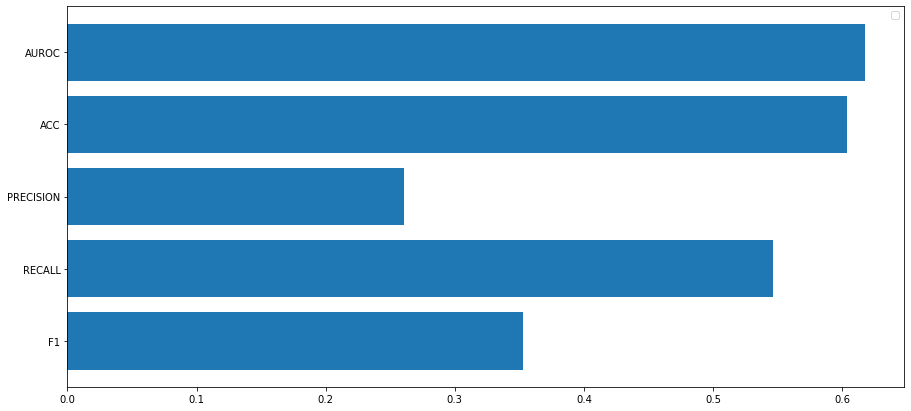

train_roc_score score:  0.682686592263053
test_roc_score score:  0.6173489485422632 

train acc score:  0.6604042917484078
test acc score:  0.6036281591180969 

train_pre score:  0.29024938479402584
test_pre score:  0.26044898704143093 

train_recall score:  0.5712788040173611
test_recall score:  0.546701402191403 

train_f1 score:  0.38492837161990334
test_f1 score:  0.3528161004796519 



In [5]:
plot(trainY, testY, train_pred, test_pred, train_prob, test_prob)

## 2019-2021 데이터 로드 

### data 2019-2021

In [5]:
import pickle
with open('./year_data/dataX.pickle', 'rb') as f:
    dataX = pickle.load(f)

In [6]:
import pickle
with open('./year_data/dataY.pickle', 'rb') as f:
    dataY = pickle.load(f)

### data2019 로드 

In [7]:
import pickle
with open('./year_data/data2019_X.pickle', 'rb') as f:
    data2019_X = pickle.load(f)

In [8]:
import pickle
with open('./year_data/data2019_Y.pickle', 'rb') as f:
    data2019_Y = pickle.load(f)

In [9]:
import pickle
with open('./year_data/lst_2019_nc.pickle', 'rb') as f:
    lst_2019_nc = pickle.load(f)

In [10]:
import pickle
with open('./year_data/lst_2019_cd.pickle', 'rb') as f:
    lst_2019_cd = pickle.load(f)

In [11]:
import pickle
with open('./year_data/lst_2019_dt.pickle', 'rb') as f:
    lst_2019_dt = pickle.load(f)

### data2020 로드 

In [12]:
import pickle
with open('./year_data/data2020_X.pickle', 'rb') as f:
    data2020_X = pickle.load(f)

In [13]:
import pickle
with open('./year_data/data2020_Y.pickle', 'rb') as f:
    data2020_Y = pickle.load(f)

In [14]:
import pickle
with open('./year_data/lst_2020_nc.pickle', 'rb') as f:
    lst_2020_nc = pickle.load(f)

In [15]:
import pickle
with open('./year_data/lst_2020_cd.pickle', 'rb') as f:
    lst_2020_cd = pickle.load(f)

In [16]:
import pickle
with open('./year_data/lst_2020_dt.pickle', 'rb') as f:
    lst_2020_dt = pickle.load(f)

In [17]:
xgb_model = pickle.load(open('xgb.model', 'rb'))

data_prob = xgb_model.predict_proba(dataX)[:, 1]
data_pred = xgb_model.predict(dataX)


### data2021 로드 

In [18]:
import pickle
with open('./year_data/data2021_X.pickle', 'rb') as f:
    data2021_X = pickle.load(f)

In [19]:
import pickle
with open('./year_data/data2021_Y.pickle', 'rb') as f:
    data2021_Y = pickle.load(f)

In [20]:
import pickle
with open('./year_data/lst_2021_nc.pickle', 'rb') as f:
    lst_2021_nc = pickle.load(f)

In [21]:
import pickle
with open('./year_data/lst_2021_cd.pickle', 'rb') as f:
    lst_2021_cd = pickle.load(f)

In [22]:
import pickle
with open('./year_data/lst_2021_dt.pickle', 'rb') as f:
    lst_2021_dt = pickle.load(f)

### 데이터 개수 확인 

In [23]:
print('====2019 data====')
print(data2019_X.shape)
print(data2019_Y.shape)
print()
print('====2020 data====')
print(data2020_X.shape)
print(data2020_Y.shape)
print()
print('====2021 data====')
print(data2021_X.shape)
print(data2021_Y.shape)

====2019 data====
(60912, 560)
(60912,)

====2020 data====
(71133, 560)
(71133,)

====2021 data====
(64768, 560)
(64768,)


In [24]:
count=sum(data2019_Y==1)
print("{:=^50}".format(" data2019_Y 의 label "))
print("1의 개수:{}, 0의 개수:{}, 1의 비율:{}".format(count, len(data2019_Y)-count, (count/len(data2019_Y))))

count=sum(data2020_Y==1)
print("{:=^50}".format(" data2020_Y 의 label "))
print("1의 개수:{}, 0의 개수:{}, 1의 비율:{}".format(count, len(data2020_Y)-count, (count/len(data2020_Y))))

count=sum(data2021_Y==1)
print("{:=^50}".format(" data2021_Y 의 label "))
print("1의 개수:{}, 0의 개수:{}, 1의 비율:{}".format(count, len(data2021_Y)-count, (count/len(data2021_Y))))

=============== data2019_Y 의 label ===============
1의 개수:10026, 0의 개수:50886, 1의 비율:0.16459810874704492
=============== data2020_Y 의 label ===============
1의 개수:15843, 0의 개수:55290, 1의 비율:0.22272363038252288
=============== data2021_Y 의 label ===============
1의 개수:12799, 0의 개수:51969, 1의 비율:0.19761301877470355


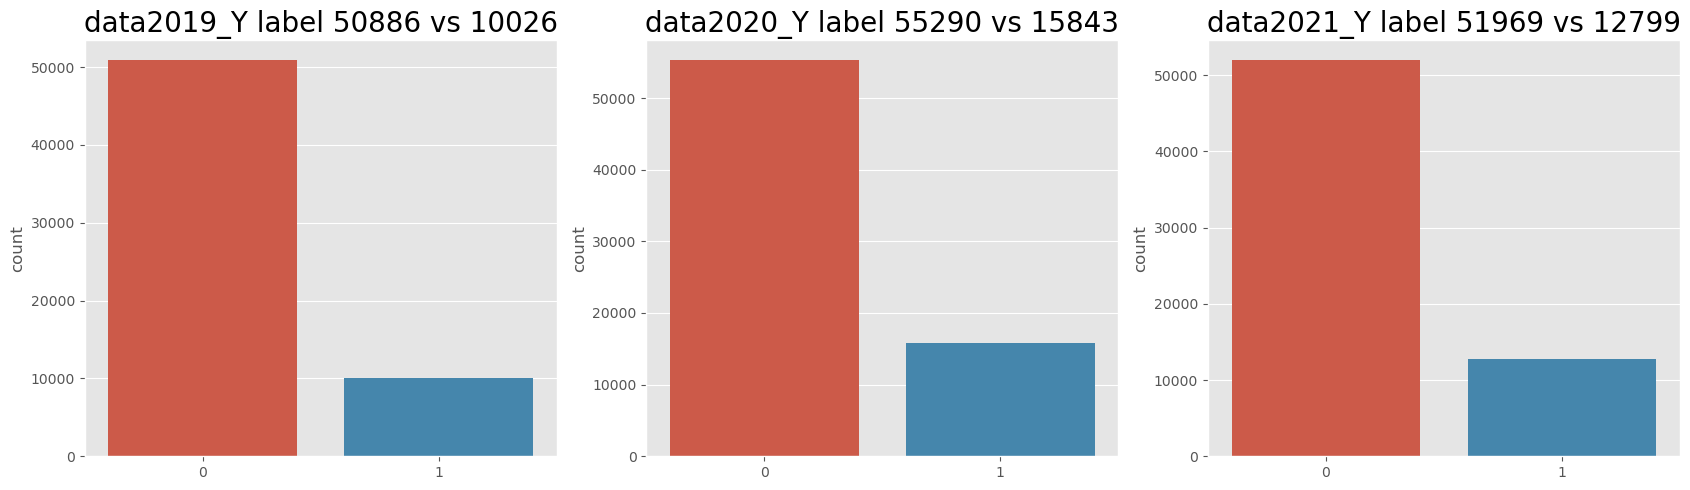

In [25]:
import seaborn as sns

plt.style.use('ggplot')
fig = plt.figure(figsize=(17, 5), dpi=100)
ax1, ax2, ax3 = fig.subplots(1, 3).flatten()

sns.countplot(list(map(int,data2019_Y)), ax=ax1)
sns.countplot(list(map(int,data2020_Y)), ax=ax2)
sns.countplot(list(map(int,data2021_Y)), ax=ax3)

ax1.set_title(f"data2019_Y label {list(data2019_Y).count(0)} vs {list(data2019_Y).count(1)}", fontsize=20)
ax2.set_title(f"data2020_Y label {list(data2020_Y).count(0)} vs {list(data2020_Y).count(1)}", fontsize=20)
ax3.set_title(f"data2021_Y label {list(data2021_Y).count(0)} vs {list(data2021_Y).count(1)}", fontsize=20)


plt.tight_layout()
plt.show()

## xgb model 로드

__xgb.model 은 train(2017-2020), test(2021) 데이터셋으로 학습된 모델__

In [26]:
# xgb.model은 train, test 데이터로 학습된 모델
xgb_model = pickle.load(open('xgb.model', 'rb'))

data2019_prob = xgb_model.predict_proba(data2019_X)[:, 1]
data2019_pred = xgb_model.predict(data2019_X)
data2020_prob = xgb_model.predict_proba(data2020_X)[:, 1]
data2020_pred = xgb_model.predict(data2020_X)
data2021_prob = xgb_model.predict_proba(data2021_X)[:, 1]
data2021_pred = xgb_model.predict(data2021_X)

#plot_roc_curve(trainY, data2019_Y, train_pred, data2019_pred, train_prob, data2019_prob)
# plot_roc_curve(trainY, data2020_Y, train_pred, data2020_pred, train_prob, data2020_prob)
# plot_roc_curve(trainY, data2021_Y, train_pred, data2021_pred, train_prob, data2021_prob)

## shap_values 로드

In [27]:
import pickle
with open('./year_data/shap_values_2019.pickle', 'rb') as f:
    shap_values_2019 = pickle.load(f)

In [28]:
import pickle
with open('./year_data/shap_values_2020.pickle', 'rb') as f:
    shap_values_2020 = pickle.load(f)

In [29]:
import pickle
with open('./year_data/shap_values_2021.pickle', 'rb') as f:
    shap_values_2021 = pickle.load(f)

In [30]:
shap_values_2021

array([[ 8.27180967e-03,  1.41200365e-03, -5.31070586e-03, ...,
        -1.10665374e-02, -1.15468376e-03, -2.71320380e-02],
       [ 3.42434598e-03,  2.02493509e-03, -2.34777783e-03, ...,
        -6.71945279e-03, -1.42474636e-03, -2.32906677e-02],
       [-3.05837428e-04, -1.87882828e-03, -1.15537830e-03, ...,
        -9.52180475e-03, -9.46334098e-04, -2.46878862e-02],
       ...,
       [-1.08253944e-03, -1.72836485e-03, -6.51349765e-05, ...,
        -1.54210199e-02, -3.66429146e-03,  1.02837626e-02],
       [ 1.13196508e-03, -1.82422122e-03, -2.05571624e-03, ...,
        -1.20086232e-02, -2.85397004e-03,  7.17577245e-03],
       [-5.93373552e-04,  1.23125117e-03, -3.86453490e-03, ...,
        -1.53840035e-02, -2.85369670e-03, -3.09864897e-02]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


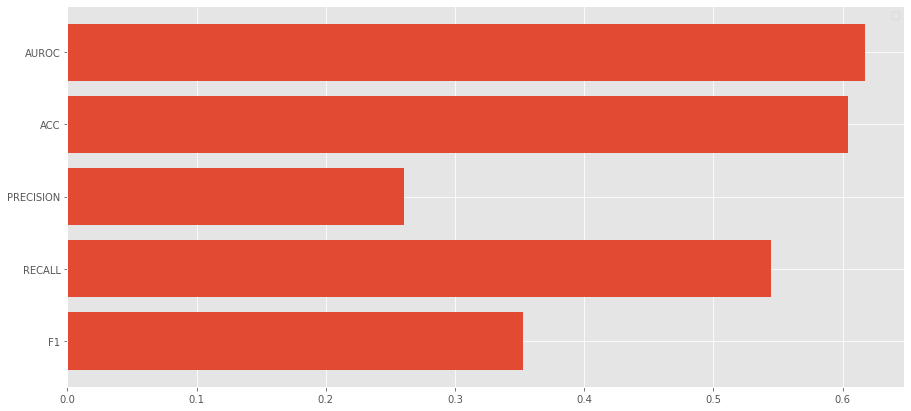

train_roc_score score:  0.6887340131963036
test_roc_score score:  0.6169544990288081 

train acc score:  0.6309443184829657
test acc score:  0.6043107707509882 

train_pre score:  0.2926268090487565
test_pre score:  0.2603937096111464 

train_recall score:  0.6282428355957768
test_recall score:  0.5446519259317134 

train_f1 score:  0.3992762653374233
test_f1 score:  0.35233762951731107 



In [31]:
xgb_model = pickle.load(open('xgb.model', 'rb'))

data_prob = xgb_model.predict_proba(dataX)[:, 1]
data_pred = xgb_model.predict(dataX)

plot(dataY, data2021_Y, data_pred, data2021_pred, data_prob, data2021_prob)


### 컬럼 리스트

In [32]:
# 컬럼 리스트 생성
lst_col_info = []

for day in range(9, -1, -1): 
    lst_col_info += 'D-{0}_Open,D-{0}_High,D-{0}_Low,D-{0}_Close,D-{0}_Trading,D-{0}_MA5,D-{0}_MA20,D-{0}_MA60,D-{0}_MA120,D-{0}_VMAP,D-{0}_BHB,D-{0}_BLB,D-{0}_KCH,D-{0}_KCL,D-{0}_KCM,D-{0}_DCH,D-{0}_DCL,D-{0}_DCM,D-{0}_SMA,D-{0}_EMA,D-{0}_WMA,D-{0}_Ichimoku,D-{0}_Parabolic SAR,D-{0}_KAMA,D-{0}_MACD,D-{0}_Change,D-{0}_Volume,D-{0}_MFI,D-{0}_ADI,D-{0}_OBV,D-{0}_CMF,D-{0}_FI,D-{0}_EOM_EMV,D-{0}_VPT,D-{0}_NVI,D-{0}_ATR,D-{0}_UI,D-{0}_ADX,D-{0}_-VI,D-{0}_+VI,D-{0}_TRIX,D-{0}_MI,D-{0}_CCI,D-{0}_DPO,D-{0}_KST,D-{0}_STC,D-{0}_RSI,D-{0}_SRSI,D-{0}_TSI,D-{0}_UO,D-{0}_SR,D-{0}_WR,D-{0}_AO,D-{0}_ROC,D-{0}_PPO,D-{0}_PVO'.format(day).split(',')

### [origin] numpy -> dataframe 

In [33]:
##### 2019
df_data2019_X = pd.DataFrame(data2019_X)
df_data2019_X.columns = lst_col_info
df_data2019_Y = pd.DataFrame(data2019_Y)

##### 2020 
df_data2020_X = pd.DataFrame(data2020_X)
df_data2020_X.columns = lst_col_info
df_data2020_Y = pd.DataFrame(data2020_Y)

##### 2021
df_data2021_X = pd.DataFrame(data2021_X)
df_data2021_X.columns = lst_col_info
df_data2021_Y = pd.DataFrame(data2021_Y)

df_data2019_X.head()

D-9_Open  D-9_High   D-9_Low  D-9_Close    D-9_Trading   D-9_MA5  D-9_MA20  \
0  1.000000  1.016176  0.985294   0.985294  197242.088235  0.973824  1.002279   
1  1.000000  1.007463  0.977612   1.007463  108373.768657  0.997910  1.011493   
2  0.989630  1.025185  0.977778   0.989630  267000.094815  0.997926  0.996889   
3  0.998540  1.016058  0.998540   1.007299  232481.649635  1.003212  0.986496   
4  1.010145  1.031884  0.994203   1.031884  269047.257971  1.003188  0.982029   

   D-9_MA60  D-9_MA120  D-9_VMAP   D-9_BHB   D-9_BLB   D-9_KCH   D-9_KCL  \
0  1.095784   1.226446  1.005579  1.082598  0.921961  1.055760  0.964730   
1  1.109254   1.241082  1.021685  1.077226  0.945759  1.064726  0.972786   
2  1.098469   1.224037  1.013063  1.044128  0.949649  1.049432  0.957877   
3  1.072092   1.186788  0.986107  1.027004  0.945988  1.033747  0.950681   
4  1.061329   1.175097  0.982452  1.028292  0.935766  1.026473  0.946184   

    D-9_KCM   D-9_DCH   D-9_DCL   D-9_DCM   D-9_SMA   D-9_EMA   D-9_WMA  \
0  1.010245  1.132353  0.935294  1.017647  0.987868  0.992065  0.980033   
1  1.018756  1.116418  0.949254  1.026866  1.002612  1.006963  0.996153   
2  1.003654  1.108148  0.942222  1.019259  0.993580  0.998049  0.991704   
3  0.992214  1.091971  0.928467  0.988321  0.988078  0.994929  0.998508   
4  0.986329  1.084058  0.921739  0.990580  0.988406  0.994514  1.000419   

   D-9_Ichimoku  D-9_Parabolic SAR  D-9_KAMA  D-9_MACD  D-9_Change  \
0      1.031618           1.049442  0.995813 -0.035059   -0.014706   
1      1.047015           1.055838  1.010651 -0.032900    0.007463   
2      1.017407           1.035556  1.002422 -0.028755   -0.010370   
3      0.999270           1.013080  0.993172 -0.014209    0.007299   
4      0.996739           1.005739  0.989309 -0.009538    0.031884   

   D-9_Volume    D-9_MFI       D-9_ADI      D-9_OBV   D-9_CMF        D-9_FI  \
0    200186.0  60.127977 -2.845400e+08  491058052.0 -0.526172  7.035211e+04   
1    107571.0  61.053379 -2.844325e+08  491165623.0 -0.500859  8.286661e+05   
2    269798.0  56.262963 -2.846460e+08  491131810.0 -0.486325 -2.089164e+06   
3    230797.0  71.222616 -2.845095e+08  491452098.0 -0.409871  4.478842e+06   
4    260734.0  76.872507 -2.842487e+08  491712832.0 -0.344287  1.203350e+07   

    D-9_EOM_EMV      D-9_VPT     D-9_NVI     D-9_ATR    D-9_UI    D-9_ADX  \
0  5.245122e+05  2894.752906  188.345846  312.862228  9.722825  18.935113   
1 -2.881818e+07 -2141.143108  189.751412  304.800640  8.813659  18.296525   
2 -5.930363e+06 -2797.905185  189.751412  309.547491  7.733905  18.397150   
3  5.199374e+05 -1013.243583  189.467145  261.816610  4.796912  18.930617   
4  8.974664e+06  9997.907606  189.467145  261.686852  3.798560  19.707766   

    D-9_-VI   D-9_+VI  D-9_TRIX     D-9_MI     D-9_CCI  D-9_DPO     D-9_KST  \
0  0.948718  1.010684 -0.537142  25.161130  -32.795876    -65.5 -121.099761   
1  0.936975  0.978992 -0.524680  25.135236  -56.403144    -17.0 -117.798710   
2  1.008639  0.946004 -0.491216  25.199347  -22.246143    221.0 -114.427532   
3  1.094801  1.006116 -0.349367  25.002574   67.759563   -257.5  -68.020251   
4  0.874233  1.049080 -0.311160  24.872436  137.562941    -96.0  -58.163755   

     D-9_STC    D-9_RSI  D-9_SRSI    D-9_TSI     D-9_UO  ...  D-0_MA20  \
0  89.141383  41.708151  0.870063 -23.647201  23.617166  ...  0.982029   
1  94.570692  43.271107  0.941878 -22.215685  33.865077  ...  0.953020   
2  98.642673  41.465898  0.788975 -20.513082  34.245441  ...  0.974140   
3  99.957584  49.196749  0.956888 -11.389444  42.822222  ...  0.982668   
4  99.978792  55.838140  1.000000  -7.921780  53.130167  ...  0.965804   

   D-0_MA60  D-0_MA120  D-0_VMAP   D-0_BHB   D-0_BLB   D-0_KCH   D-0_KCL  \
0  1.061329   1.175097  0.982452  1.028292  0.935766  1.026473  0.946184   
1  1.025702   1.135393  0.956739  0.999077  0.906962  0.996138  0.918890   
2  1.041977   1.152065  0.984007  1.024357  0.923924  1.011246  0.942908   
3  1.035687   1.131194  0

### [shap] numpy -> dataframe

In [34]:
##### 2019
df_shap_2019 = pd.DataFrame(shap_values_2019)
df_shap_2019.columns = lst_col_info

##### 2020
df_shap_2020 = pd.DataFrame(shap_values_2020)
df_shap_2020.columns = lst_col_info

##### 2021
df_shap_2021 = pd.DataFrame(shap_values_2021)
df_shap_2021.columns = lst_col_info

#### df가 맞는지 확인  - 절댓값 씌운 후 컬럼 별 합 내림차순 정렬이 summary plot과 같은지 확인 

In [35]:
pd.DataFrame(df_shap_2019.apply(lambda x: abs(x)).sum().sort_values(ascending=False)).head(10)

0
D-0_High     7792.893555
D-0_KCL      6992.355957
D-0_DCH      6340.408203
D-0_Close    1850.875244
D-0_MA120    1730.787964
D-0_Trading  1220.923462
D-0_SR       1163.227661
D-0_PVO      1100.709106
D-4_Low      1042.903687
D-0_MA5      1018.443665

# summary plot

### shap value 계산 

In [36]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)

In [37]:
importances = xgb_model.feature_importances_
feature_importance = np.array(importances)

feature_importance

array([0.0013986 , 0.0011209 , 0.00205332, 0.00107405, 0.00091127,
       0.00118845, 0.00081337, 0.00148416, 0.00237495, 0.00137592,
       0.00130926, 0.00147548, 0.00164285, 0.00118718, 0.00202678,
       0.00102882, 0.00216296, 0.0011104 , 0.00114567, 0.00156733,
       0.00112624, 0.00193658, 0.00109882, 0.00124156, 0.00094635,
       0.        , 0.00208352, 0.00132284, 0.00140446, 0.00091706,
       0.00128553, 0.00126814, 0.00135018, 0.00121757, 0.00153255,
       0.00102058, 0.00150845, 0.00147132, 0.00147858, 0.0017586 ,
       0.0019508 , 0.00151337, 0.00146166, 0.00139952, 0.00194586,
       0.0012733 , 0.0013652 , 0.00135733, 0.00281774, 0.0010599 ,
       0.00156844, 0.        , 0.00157682, 0.00213511, 0.00241053,
       0.00140191, 0.00155742, 0.00157373, 0.00154846, 0.00111567,
       0.00206013, 0.0013641 , 0.00100103, 0.00133232, 0.00179894,
       0.00219096, 0.00166252, 0.00187923, 0.00174096, 0.00161495,
       0.0014394 , 0.00181628, 0.00186119, 0.00109383, 0.00145

### 2019

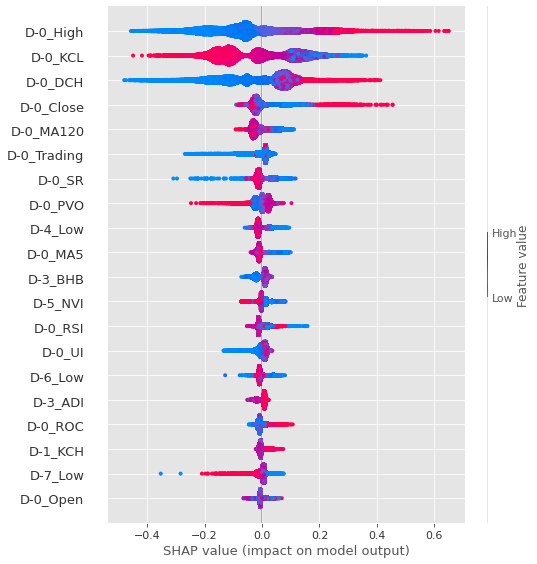

In [38]:
shap.summary_plot(shap_values_2019, df_data2019_X)

### 2020

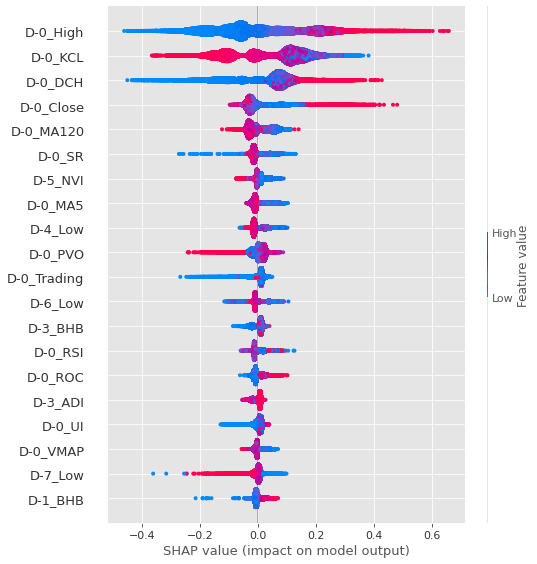

In [39]:
shap.summary_plot(shap_values_2020, df_data2020_X)

### 2021

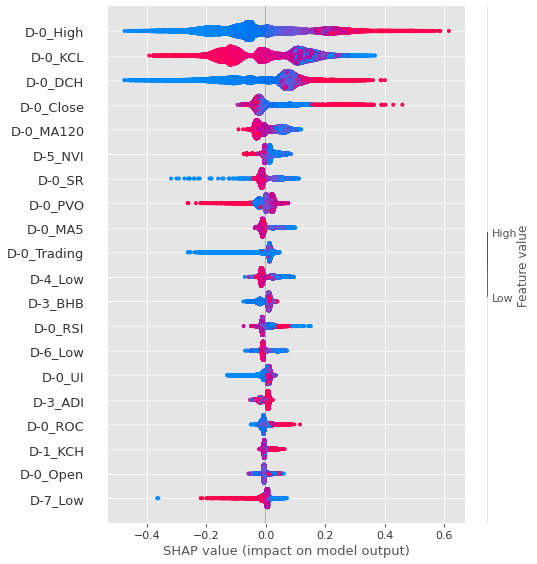

In [40]:
shap.summary_plot(shap_values_2021, df_data2021_X)

# TSNE & Clustering

### __tsne__
   - 공식 문서:  https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
   - 예제 참고: https://jimmy-ai.tistory.com/126

<br>

### Clustering 
#### 비계층적 군집분석, Non-Hierarchical Clustering 
예제 참고: https://yganalyst.github.io/ml/ML_clustering/ 
- __중심 기반, Center-based__ <br>
: K-means
    - 공식 문서: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


- __밀도 기반, density based__  <br>
: DBSCAN (density-based spatial clustering of applications with noise)
    - 공식 문서: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


#### 계층적 군집분석,  hierarchical clustering

### 함수

In [41]:
plt.style.use('default')

#### tsne_plot

In [42]:
from sklearn.manifold import TSNE

def tsne_plot(np_tsne, df_data_Y, alpha=0.4, size=3):
    # numpy array -> Dataframe 
    df_tsne = pd.DataFrame(np_tsne, columns=['component0', 'component1'])

    # class target 정보 불러오기
    df_tsne['target'] = df_data_Y[0]

    # target 별 분리 
    df_tsne_0 = df_tsne[df_tsne['target']==0]
    df_tsne_1 = df_tsne[df_tsne['target']==1]

    # target 별 시각화 
    plt.scatter(df_tsne_0['component0'], df_tsne_0['component1'], color = 'green', label = 'class 0', alpha=alpha, s=size)
    plt.scatter(df_tsne_1['component0'], df_tsne_1['component1'], color = 'pink', label = 'class 1', alpha=alpha, s=size)

    plt.xlabel('component 0')
    plt.ylabel('component 1')
    plt.legend()
    plt.show()    

#### clustering_plot

In [43]:
##### 함수 수정 
def clustering_plot(method, np_tsne, dendrogram_yn='n', method_h='complete', n_clusters=5, min_samples=5, alpha=0.3, size=4):
    # method - k: kmeans, d: DBSCAN, h: hierarchical
    if method == 'k':
        from sklearn.cluster import KMeans
        import matplotlib.pyplot as plt
        
        km = KMeans(n_clusters = n_clusters, random_state=42)
        km.fit(np_tsne)    
        new_labels = km.labels_
        plt.title("K-means", fontsize=15)
        scatter = plt.scatter(np_tsne[:, 0], np_tsne[:, 1], c=new_labels, cmap='gist_rainbow', s=size, alpha=alpha, )
        plt.legend(*scatter.legend_elements())
        return new_labels
        
        
    elif method == 'd':
        from sklearn.cluster import DBSCAN
        import matplotlib.pyplot as plt
        clusters = DBSCAN(eps=0.3, min_samples=min_samples).fit(np_tsne)
        plt.title("DBSCAN", fontsize=15)
        scatter = plt.scatter(np_tsne[:, 0],np_tsne[:, 1],c=clusters.labels_, cmap='gist_rainbow', s=size, alpha=alpha)
        plt.grid()
        plt.legend(*scatter.legend_elements())
        plt.show()
        return clusters

    elif method == 'h':
        from scipy.cluster.hierarchy import linkage, dendrogram
        import matplotlib.pyplot as plt
        clusters = linkage(y=np_tsne, method=method_h, metric='euclidean')
        print("linkage complete")
        
#         plt.figure( figsize = (25, 10) )
        if dendrogram_yn == 'y':
            plt.title("hierarchical", fontsize=15)
            dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
            plt.show() 
            
        return clusters 
        
    else:
        print("method를 잘못 입력하였습니다.")

#### hierarchical_clustering_plot

In [44]:
def hierarchical_clustering_plot(method, np_tsne, dendrogram_yn='n', n_clusters=5, min_samples=5, alpha=0.3, size=4):
    # method - complete, average, ward
    
    if method in ('complete', 'average', 'ward'):
        from scipy.cluster.hierarchy import linkage, dendrogram
        import matplotlib.pyplot as plt
        clusters = linkage(y=np_tsne, method=method, metric='euclidean')
        print("linkage complete")
        
        if dendrogram_yn == 'y':
            plt.title("hierarchical", fontsize=15)
            dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
            plt.show() 
            
        return clusters 
        
    else:
        print("method를 잘못 입력하였습니다.")

#### fcluster_plot

In [45]:
def fcluster_plot(np_clusters, np_tsne, t=30, alpha=0.3, size=4):
    from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기
    
    cut_tree = fcluster(np_clusters, t=t, criterion='distance')
    print("군집의 개수:", len(pd.DataFrame(cut_tree)[0].unique()))
    scatter = plt.scatter(x=np_tsne[:, 0], y=np_tsne[:, 1], c=cut_tree, cmap='gist_rainbow', alpha=alpha, s=size)
    plt.legend(*scatter.legend_elements())
    
    return cut_tree

linkage method
- single
- **complete**
- average
- weighted
- centroid
- median
- ward

#### label_1_clustering_plot

In [46]:
# 라벨 1의 비율이 ratio 이상인 군집만 뽑아 시각화 
def label_1_clustering_plot(df_shap, xlim=70,ylim=70, ratio=0.5):
    # ratio: (default) 0.5 -> 1의 비율이 0.5 이상  
    
    gb = df_shap.groupby('Cluster')['Label'].value_counts(sort=False).unstack() # 군집 별 라벨 개수
    idx_label_1 = gb[gb[1]/(gb[0]+gb[1]) > ratio].index # 라벨 1의 비율이 ratio 이상인 군집 번호
    print(f'label 1 > {ratio} 군집 번호: ', idx_label_1)
    
    df_shap_1 = df_shap[df_shap['Cluster'].isin(idx_label_1)] # 라벨 1의 비율이 ratio 이상인 군집 추출 
    plt.title(f"label 1 > {ratio}", fontsize=15)
    scatter = plt.scatter(df_shap_1['component1'],df_shap_1['component2'],c=df_shap_1['Cluster'], cmap='gist_rainbow', s=3, alpha=0.4)
    plt.legend(*scatter.legend_elements())
    plt.ylim(-ylim, ylim) # tsne 범위와 맞추기
    plt.xlim(-xlim, xlim)
    
    return df_shap_1

#### label_1_clustering_plot

In [47]:
# 라벨 0의 비율이 ratio 이상인 군집만 뽑아 시각화 
def label_0_clustering_plot(df_shap, xlim=70,ylim=70, ratio=0.5):
    # ratio: (default) 0.5 -> 1의 비율이 0.5 이상  
    
    gb = df_shap.groupby('Cluster')['Label'].value_counts(sort=False).unstack()  # 군집 별 라벨 개수
    idx_label_0 = gb[gb[0]/(gb[0]+gb[1]) > ratio].index # 라벨 1의 비율이 ratio 이상인 군집 번호
    print(f'label 1 > {ratio} 군집 번호: ', idx_label_0)
    
    df_shap_0 = df_shap[df_shap['Cluster'].isin(idx_label_0)] # 라벨 0의 비율이 ratio 이상인 군집 추출 
    plt.title(f"label 0 > {ratio}", fontsize=15)
    scatter = plt.scatter(df_shap_0['component1'],df_shap_0['component2'],c=df_shap_0['Cluster'], cmap='gist_rainbow', s=3, alpha=0.4)
    plt.legend(*scatter.legend_elements())
    plt.ylim(-ylim, ylim) # tsne 범위와 맞추기
    plt.xlim(-xlim, xlim)
    
    return df_shap_0

#### xgb_summary_plot

In [48]:
# 라벨 1의 비율이 ratio 이상인 군집을 라벨 1로 하여 모델 학습 , summary plot 시각화  
def xgb_summary_plot(df_shap, df_shap_1, year, mode='load'):
    # mode: load(저장된 모델 로드) or save(모델 학습 및 저장)
    label = np.zeros(len(df_shap)) # 라벨 초기화
    label[df_shap_1.index] = 1 # label_1_clustering_plot 함수에서 구한 군집들의 라벨을 1로 설정
    X = df_shap[lst_col_info].copy()
    y = label.copy()
    
    if mode == 'save': # 모델 학습 및 저장
        print("===start xgb===")
        from xgboost import XGBClassifier
        import pickle

        xgb_model = XGBClassifier(
                           n_jobs=40,
                           scale_pos_weight=4,
                           learning_rate=0.01,
                           max_depth=5,
                           n_estimators=1000,
                           ) # 임의의 값 (튜닝값 x)

        xgb_model.fit(X, y)
        pickle.dump(xgb_model, open(f'xgb.model_{year}', 'wb'))
        print("===complete xgb===")
        
    elif mode == 'load': # 모델 로드 
        import pickle
        xgb_model = pickle.load(open(f'xgb.model_{year}', 'rb'))
        
        
    print('===start shap value===')
    import shap
    shap.initjs()
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X)

#### feature importance plot

In [49]:
# 라벨 1의 비율이 ratio 이상인 군집을 라벨 1로 하여 모델 학습 , summary plot 시각화  
def xgb_importance(df_shap, df_shap_1, year, mode='load'):
    # mode: load(저장된 모델 로드) or save(모델 학습 및 저장)
    label = np.zeros(len(df_shap)) # 라벨 초기화
    label[df_shap_1.index] = 1 # label_1_clustering_plot 함수에서 구한 군집들의 라벨을 1로 설정
    X = df_shap[lst_col_info].copy()
    y = label.copy()
    
    if mode == 'save': # 모델 학습 및 저장
        print("===start xgb===")
        from xgboost import XGBClassifier
        import pickle

        xgb_model = XGBClassifier(
                           n_jobs=40,
                           learning_rate=0.01,
                           max_depth=5,
                           n_estimators=1000,
                           ) # 임의의 값 (튜닝값 x)

        xgb_model.fit(X, y)
        pickle.dump(xgb_model, open(f'xgb.model_{year}', 'wb'))
        print("===complete xgb===")
        
    elif mode == 'load': # 모델 로드 
        import pickle
        xgb_model = pickle.load(open(f'xgb.model_{year}', 'rb'))
        
        
    print('===start shap value===')
    from xgboost import plot_importance
    plot_importance(xgb_model, max_num_features=20)

----------------

## [shap] 2019

### tsne

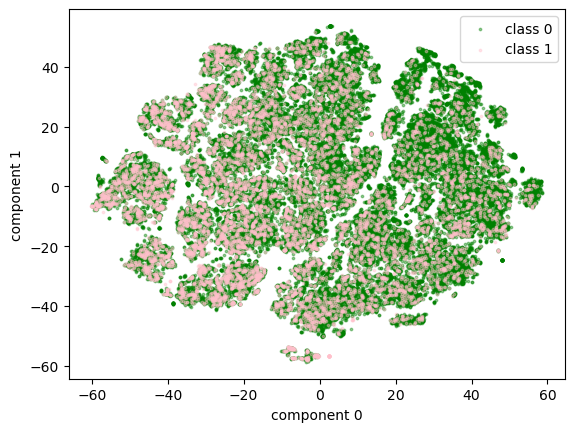

In [50]:
import pickle
with open('./year_data/np_tsne_shap_2019.pickle', 'rb') as f:
    np_tsne_shap_2019 = pickle.load(f)
    
tsne_plot(np_tsne=np_tsne_shap_2019, df_data_Y=df_data2019_Y)

### average

군집의 개수: 57


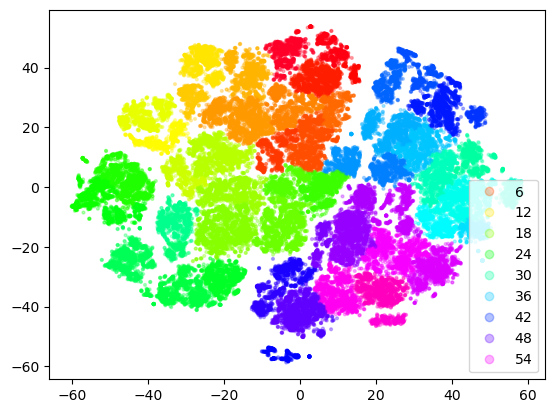

In [51]:
import pickle
with open('./year_data/clusters_avg_shap_2019.pickle', 'rb') as f:
    clusters_avg_shap_2019 = pickle.load(f)
    
cut_tree_avg_shap_2019=fcluster_plot(np_clusters=clusters_avg_shap_2019, np_tsne=np_tsne_shap_2019, t=10) # t가 작을수록 군집 개수 증가

##### 군집 별 데이터(label) 확인

<AxesSubplot:xlabel='count', ylabel='Cluster'>

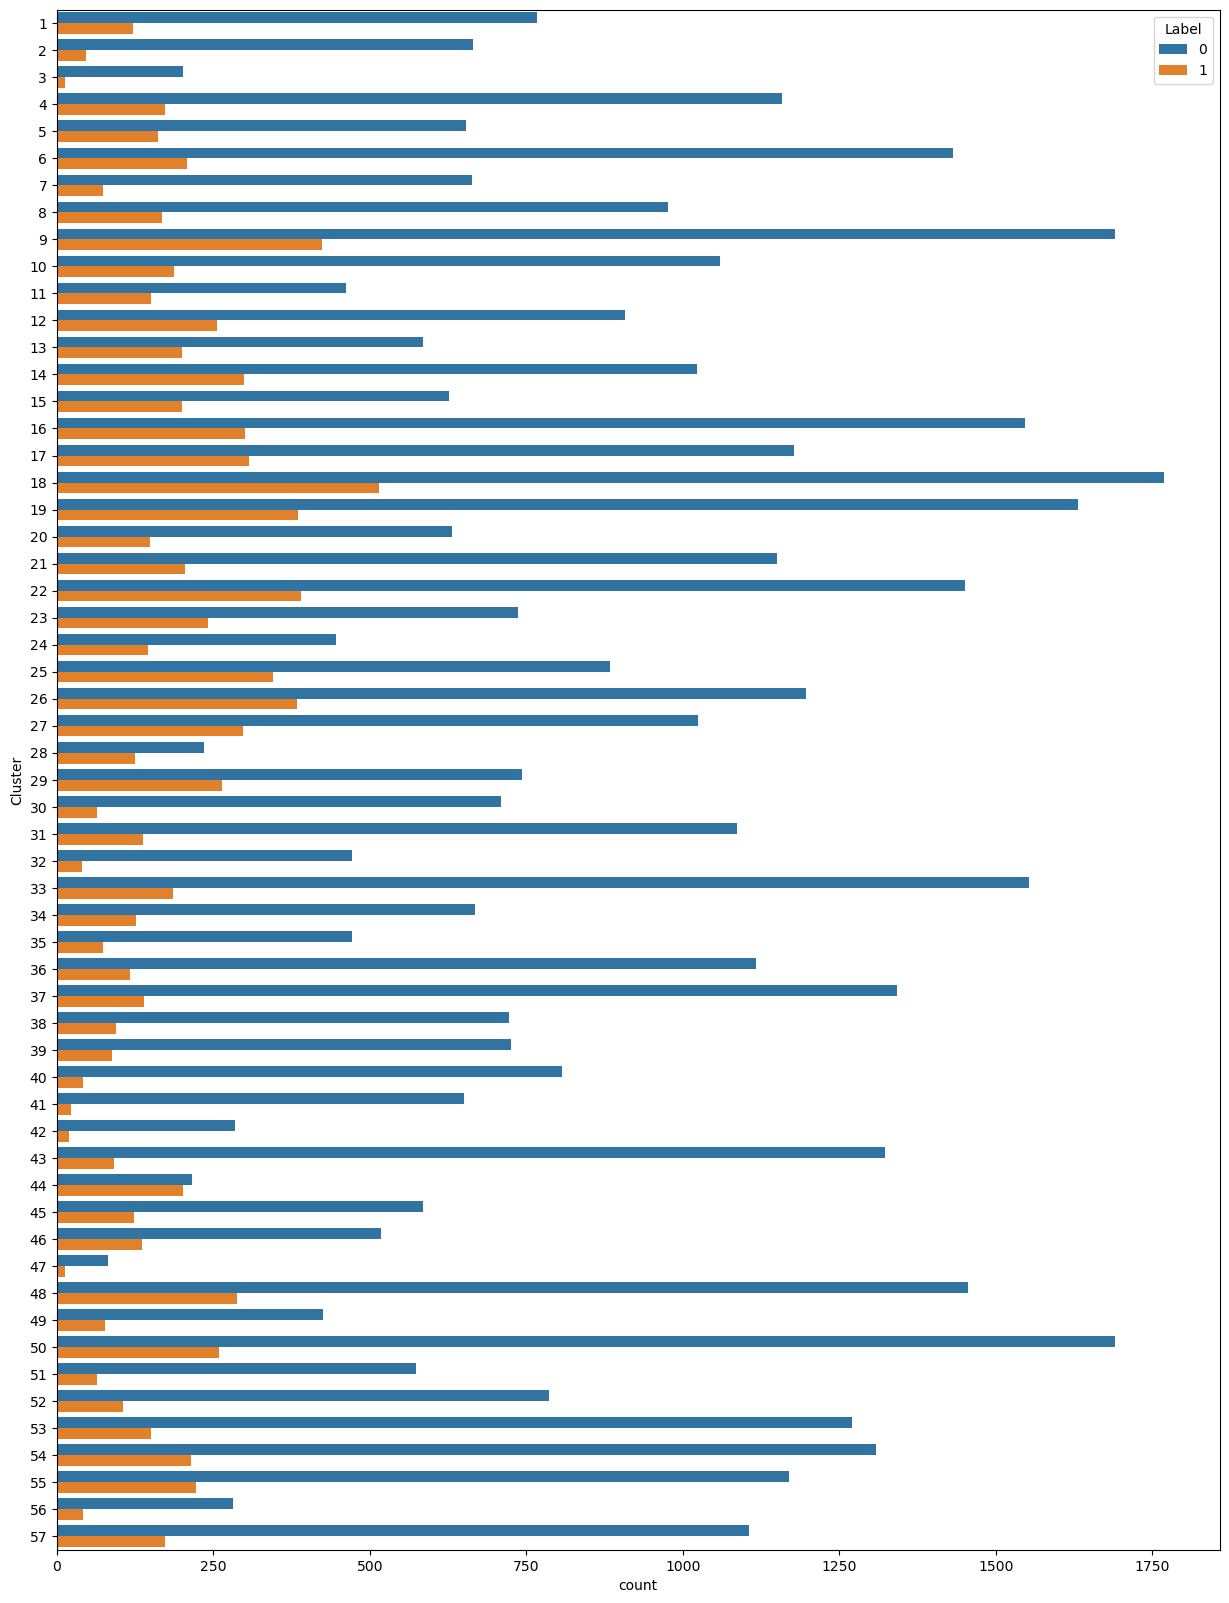

In [52]:
df_shap_2019['Code'] = lst_2019_cd
df_shap_2019['Date'] = lst_2019_dt
df_shap_2019['Label'] = df_data2019_Y[0]
df_shap_2019['Cluster'] = cut_tree_avg_shap_2019
df_shap_2019 = df_shap_2019[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]

# tsne feature 추가 
df_shap_2019['component1'] = np_tsne_shap_2019[:, 0]
df_shap_2019['component2'] = np_tsne_shap_2019[:, 1]


df_shap_2019.head()
plt.figure(figsize=(15, 20))
sns.countplot(data=df_shap_2019, y='Cluster', hue='Label')

##### 군집별 라벨

<AxesSubplot:xlabel='Cluster'>

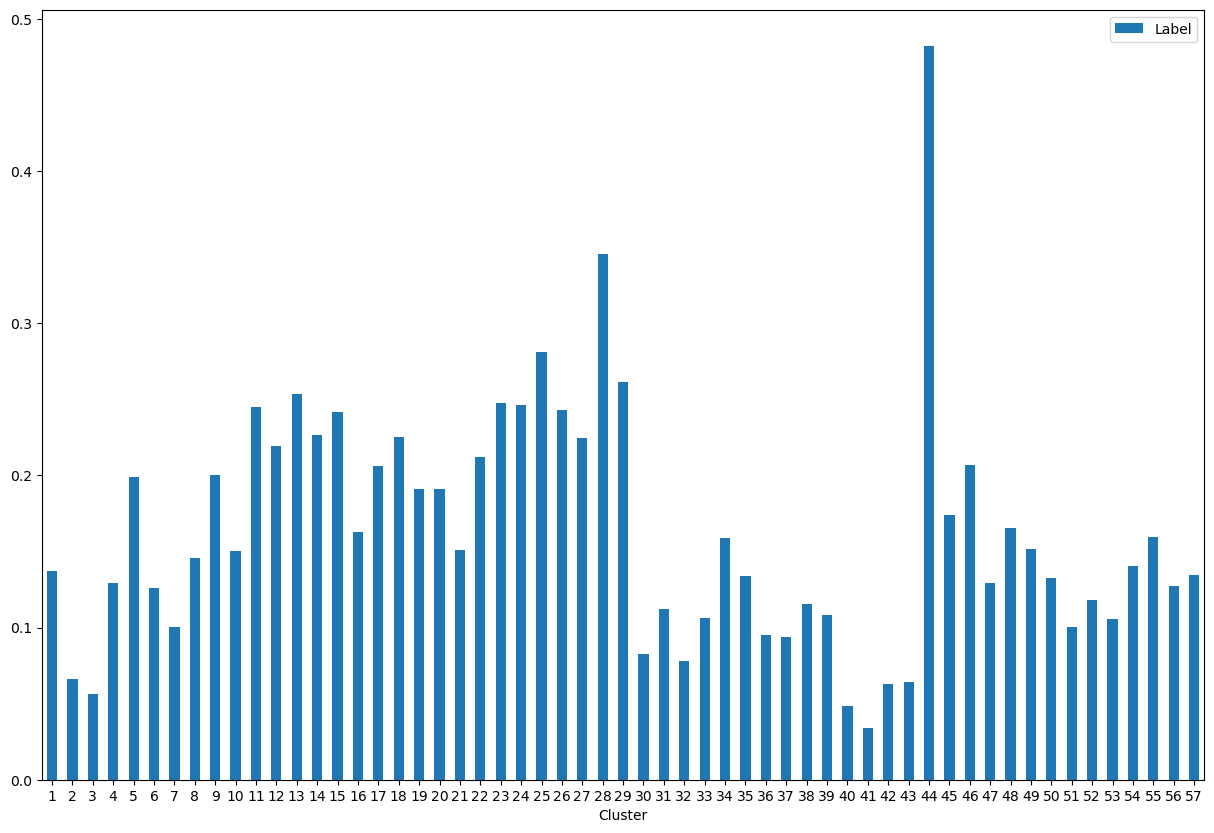

In [53]:
a = pd.DataFrame(df_shap_2019.groupby('Cluster')['Label'].sum()/df_shap_2019.groupby('Cluster')['Label'].count())
a.plot.bar(figsize=(15,10),rot=0)

#### 라벨 1의 비율 ratio 이상인 군집만 시각화 하고, tsne plot과 비교해 보기 

label 1 > 0.25 군집 번호:  Int64Index([13, 25, 28, 29, 44], dtype='int64', name='Cluster')


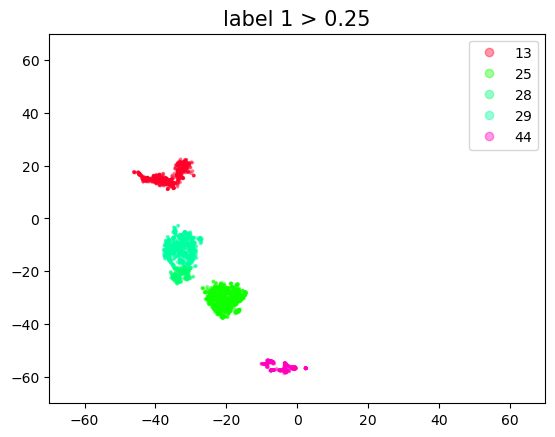

In [54]:
df_shap_2019_1 = label_1_clustering_plot(df_shap_2019, xlim=70,ylim=70, ratio=0.25) # ratio 조정 (1의 비율)

In [79]:
#print(df_shap_2019_1.shape) # 데이터, 차트 확인 
#print(df_shap_2019_1['Cluster'].value_counts().head())
#print(df_shap_2019_1['Date'].value_counts().head())
print(df_shap_2019_1[df_shap_2019_1['Date'] == '20190617']['Code'])
#df_shap_2019_1.head()

2682     049480
2996     047560
3046     123570
3758     139670
5852     214680
6415     208710
10187    067990
15688    205500
17477    023900
18527    040610
19036    010170
19537    101330
21075    073110
21410    115440
24678    054630
27191    060250
28095    014470
31681    215000
35529    091440
37777    003720
38667    031820
41999    010100
42632    001380
50481    008420
52931    001140
53300    002210
53999    093230
54872    010660
58692    028100
60406    003680
Name: Code, dtype: object


In [72]:
# 054930 20190115~16 거래정지
df_shap_2019_1[df_shap_2019_1['Date'] == '20190122']['Code']

614      012340
890      066900
1976     095910
2877     054930
11554    038110
11720    065500
11860    104830
12260    054210
14000    025440
14398    012860
15156    122690
15351    025320
15559    038880
16163    232140
17177    182360
17815    097870
19214    041930
20305    204630
23864    100660
25576    026040
30371    000440
30879    134580
32052    075970
32912    053060
33071    049830
33692    170920
33820    039830
37121    002100
37335    128820
37720    068290
38384    081000
41394    013870
42024    018880
42995    058730
43296    013570
46633    009140
46896    014160
48928    001020
51259    009270
51717    018470
51729    009070
51911    019180
53044    000430
56418    014910
60064    033250
60866    010690
Name: Code, dtype: object

===start shap value===
===start shap value===


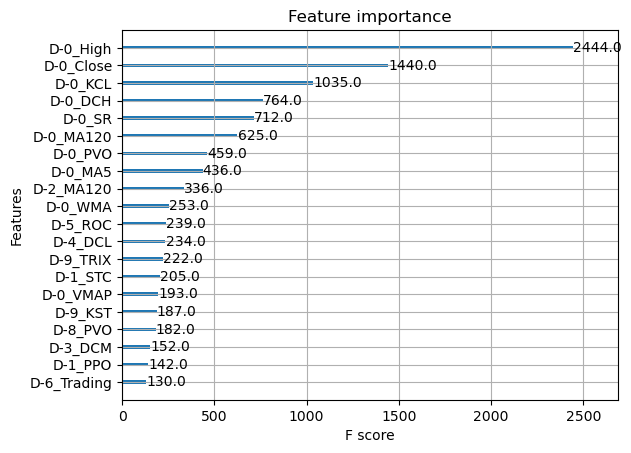

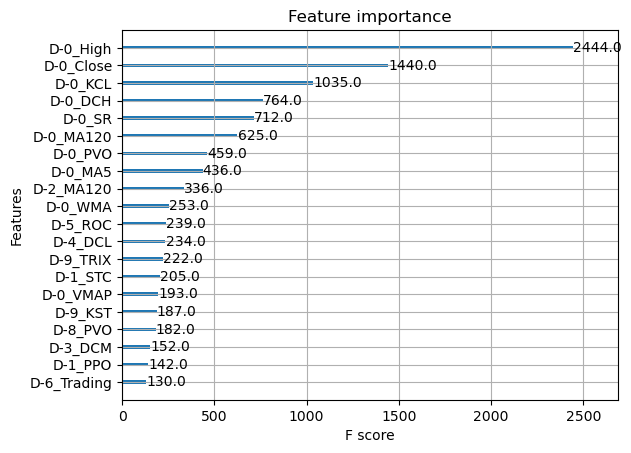

In [57]:
 xgb_importance(df_shap_2019, df_shap_2019_1, year=2019, mode='load')
xgb_importance(df_shap_2019, df_shap_2019_1, year=2019, mode='load') 

#### 라벨 0의 비율 ratio 이상인 군집만 시각화 하고, tsne plot과 비교해 보기 <br>
: 핑크색은 고르게 분포되어 있고 초록색이 뚜렷하게 진할 경우에 진행 

label 1 > 0.95 군집 번호:  Int64Index([40, 41], dtype='int64', name='Cluster')


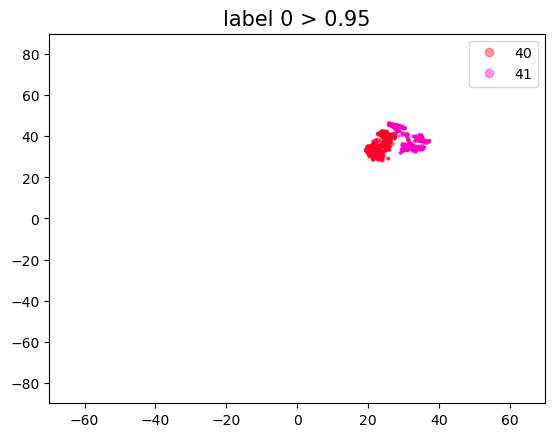

In [58]:
df_shap_2019_0 = label_0_clustering_plot(df_shap_2019, xlim=70,ylim=90, ratio=0.95) # ratio 조정 (1의 비율)

In [59]:
print(df_shap_2019_0.shape) # 데이터, 차트 확인 
print(df_shap_2019_0['Date'].value_counts().head())
df_shap_2019_0.head()

(1521, 566)
20190215    31
20191218    28
20190923    25
20190917    25
20190214    23
Name: Date, dtype: int64


Code      Date  Cluster  D-9_Open  D-9_High   D-9_Low  D-9_Close  \
378  019660  20190416       41 -0.001500 -0.001961 -0.003062  -0.000100   
587  054050  20190813       40 -0.001538 -0.000637  0.000463  -0.000092   
639  078140  20190125       40 -0.004593  0.003440 -0.004279  -0.000072   
644  078140  20190208       41 -0.000495  0.000390 -0.002303  -0.000034   
730  023910  20190320       41  0.000905 -0.000147  0.002085   0.000084   

     D-9_Trading   D-9_MA5  D-9_MA20  D-9_MA60  D-9_MA120  D-9_VMAP   D-9_BHB  \
378     0.000051 -0.000547 -0.000239 -0.001203  -0.000262 -0.000437 -0.013664   
587    -0.000306 -0.000048 -0.000163 -0.000022  -0.003609 -0.000017  0.001883   
639     0.001211 -0.000284 -0.000180  0.000204  -0.001293 -0.000017  0.000468   
644    -0.000196 -0.000308 -0.000179  0.000174  -0.001542 -0.000038  0.001911   
730    -0.000158  0.000161 -0.000281  0.000355  -0.004217 -0.000042 -0.026413   

      D-9_BLB   D-9_KCH   D-9_KCL   D-9_KCM   D-9_DCH   D-9_DCL   D-9_DCM  \
378 -0.000620 -0.001821 -0.000201 -0.000029  0.000487  0.000396 -0.000624   
587  0.001543  0.004517 -0.001068 -0.000025  0.001268 -0.001866 -0.000098   
639 -0.000279 -0.002052  0.000539 -0.000021  0.000043  0.000118  0.000392   
644 -0.000584 -0.002364 -0.000006 -0.000026  0.000225  0.000399 -0.000236   
730 -0.000507 -0.002329 -0.000271 -0.000020 -0.003846  0.000790  0.000515   

      D-9_SMA   D-9_EMA   D-9_WMA  D-9_Ichimoku  D-9_Parabolic SAR  D-9_KAMA  \
378 -0.001505  0.000022 -0.000582     -0.000605           0.000071  0.000305   
587  0.000138 -0.000174  0.001549     -0.000229           0.000072 -0.000081   
639 -0.000576  0.000018 -0.001414     -0.000556          -0.000319  0.000067   
644 -0.000576 -0.000007  0.003644     -0.000181          -0.000330 -0.000453   
730 -0.003293  0.000328 -0.000600     -0.000238          -0.000062  0.000663   

     D-9_MACD  D-9_Change  D-9_Volume   D-9_MFI   D-9_ADI   D-9_OBV   D-9_CMF  \
378 -0.000098         0.0   -0.000173  0.000094 -0.000055 -0.002671  0.008153   
587 -0.000098         0.0   -0.000496 -0.001303  0.000141 -0.002518 -0.009984   
639 -0.000122         0.0   -0.000239  0.000094  0.000290 -0.001915 -0.010676   
644  0.000192         0.0    0.000315 -0.000006  0.000288 -0.001646 -0.009649   
730  0.000034         0.0   -0.000206  0.000039  0.000134 -0.001549  0.008583   

       D-9_FI  D-9_EOM_EMV       D-9_VPT   D-9_NVI   D-9_ATR    D-9_UI  \
378  0.000638     0.000737  5.784025e-05  0.005983 -0.000075  0.002829   
587  0.001599     0.000962  1.911570e-06  0.004804  0.000006  0.005041   
639  0.001394    -0.000592  7.912407e-05 -0.001759  0.000003  0.006434   
644  0.001069    -0.000398 -3.287667e-07 -0.000472  0.000200 -0.015774   
730  0.001587    -0.002009  1.555546e-04 -0.002264  0.000186 -0.019001   

      D-9_ADX   D-9_-VI   D-9_+VI  D-9_TRIX    D-9_MI   D-9_CCI   D-9_DPO  \
378 -0.000220  0.000031  0.003652 -0.000085  0.001463 -0.000014  0.000216   
587 -0.000046  0.000130  0.000505 -0.000067 -0.001622  0.000867  0.000210   
639  0.000037 -0.000164  0.002506 -0.000066  0.002538 -0.000237  0.000713   
644  0.001182 -0.000166  0.003559  0.000137  0.000571 -0.000114  0.000747   
730 -0.000080 -0.000288  0.002871 -0.000025 -0.002561 -0.000074  0.000755   

      D-9_KST   D-9_STC   D-9_RSI  ...  D-0_VMAP   D-0_BHB   D-0_BLB  \
378 -0.001443  0.000022  0.000013  ... -0.001996 -0.001053 -0.000265   
587 -0.000715  0.000152  0.000132  ... -0.001861 -0.001677 -0.000585   
639 -0.000676 -0.000546  0.000287  ... -0.002894 -0.000789 -0.000622   
644 -0.000561 -0.001788  0.000296  ... -0.002224 -0.001384 -0.000324   
730 -0.000652 -0.000560  0.000277  ... -0.002078 -0.001641 -0.000400   

      D-0_KCH   D-0_KCL   D-0_KCM   D-0_DCH   D-0_DCL   D-0_DCM   D-0_SMA  \
378 -0.008604 -0.226041 -0.000068 -0.196842 -0.006826 -0.000296  0.000046   
587 -0.004644 -0.127351 -0.000068 -0.261148  0.000322 -0.000073  0.000064   
639 -0.006936 -0.149172 -0.000027 -0.293523  0.001091 -0.000318  0

#### 라벨 1의 비율이 ratio 이상인 군집을 라벨 1 로 하여 학습한 후, summary plot 시각화 

===start shap value===


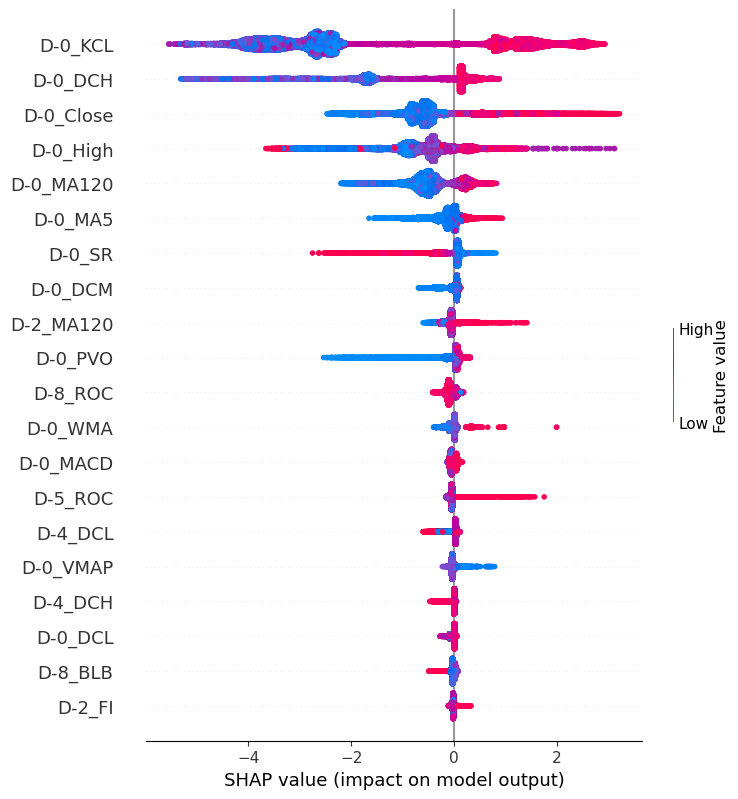

In [60]:
#xgb_summary_plot(df_shap_2019, df_shap_2019_1, year=2019, mode='save') 
xgb_summary_plot(df_shap_2019, df_shap_2019_1, year=2019, mode='load') # 학습 후 load로 변경

# 특정 군집만 학습하고 싶은 경우 
#xgb_summary_plot(df_shap_2019, df_shap_2019_1[df_shap_2019_1['Cluster'].isin([25,29,13])], year=2019, mode='save') 
#xgb_summary_plot(df_shap_2019, df_shap_2019_1[df_shap_2019_1['Cluster'].isin([25,29,13])], year=2019, mode='load') # 학습 후 load로 변경

## [shap] 2020

### tsne

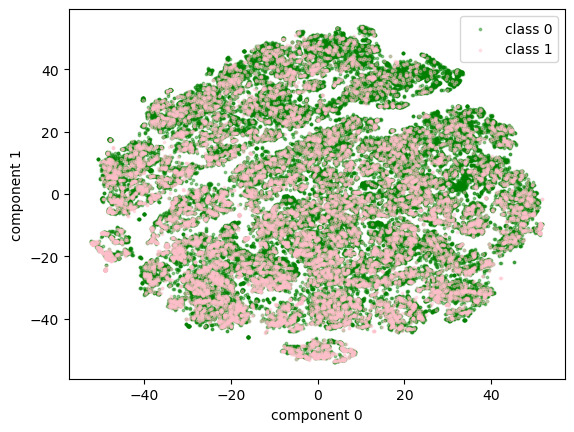

In [61]:
import pickle
with open('./year_data/np_tsne_shap_2020.pickle', 'rb') as f:
    np_tsne_shap_2020 = pickle.load(f)
    
tsne_plot(np_tsne=np_tsne_shap_2020, df_data_Y=df_data2020_Y)

### average

군집의 개수: 54


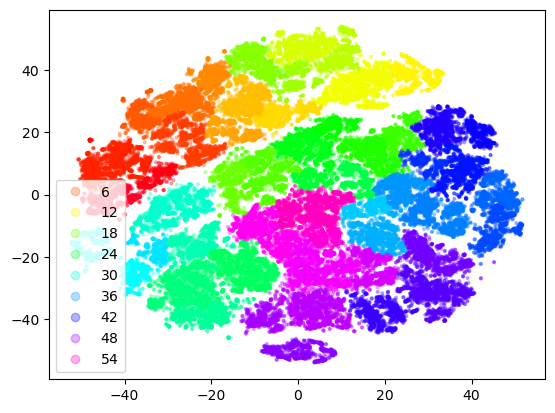

In [62]:
import pickle
with open('./year_data/clusters_avg_shap_2020.pickle', 'rb') as f:
    clusters_avg_shap_2020 = pickle.load(f)
    
cut_tree_avg_shap_2020=fcluster_plot(np_clusters=clusters_avg_shap_2020, np_tsne=np_tsne_shap_2020, t=10) # t가 작을수록 군집 개수 증가

##### 군집 별 데이터(label) 확인

<AxesSubplot:xlabel='count', ylabel='Cluster'>

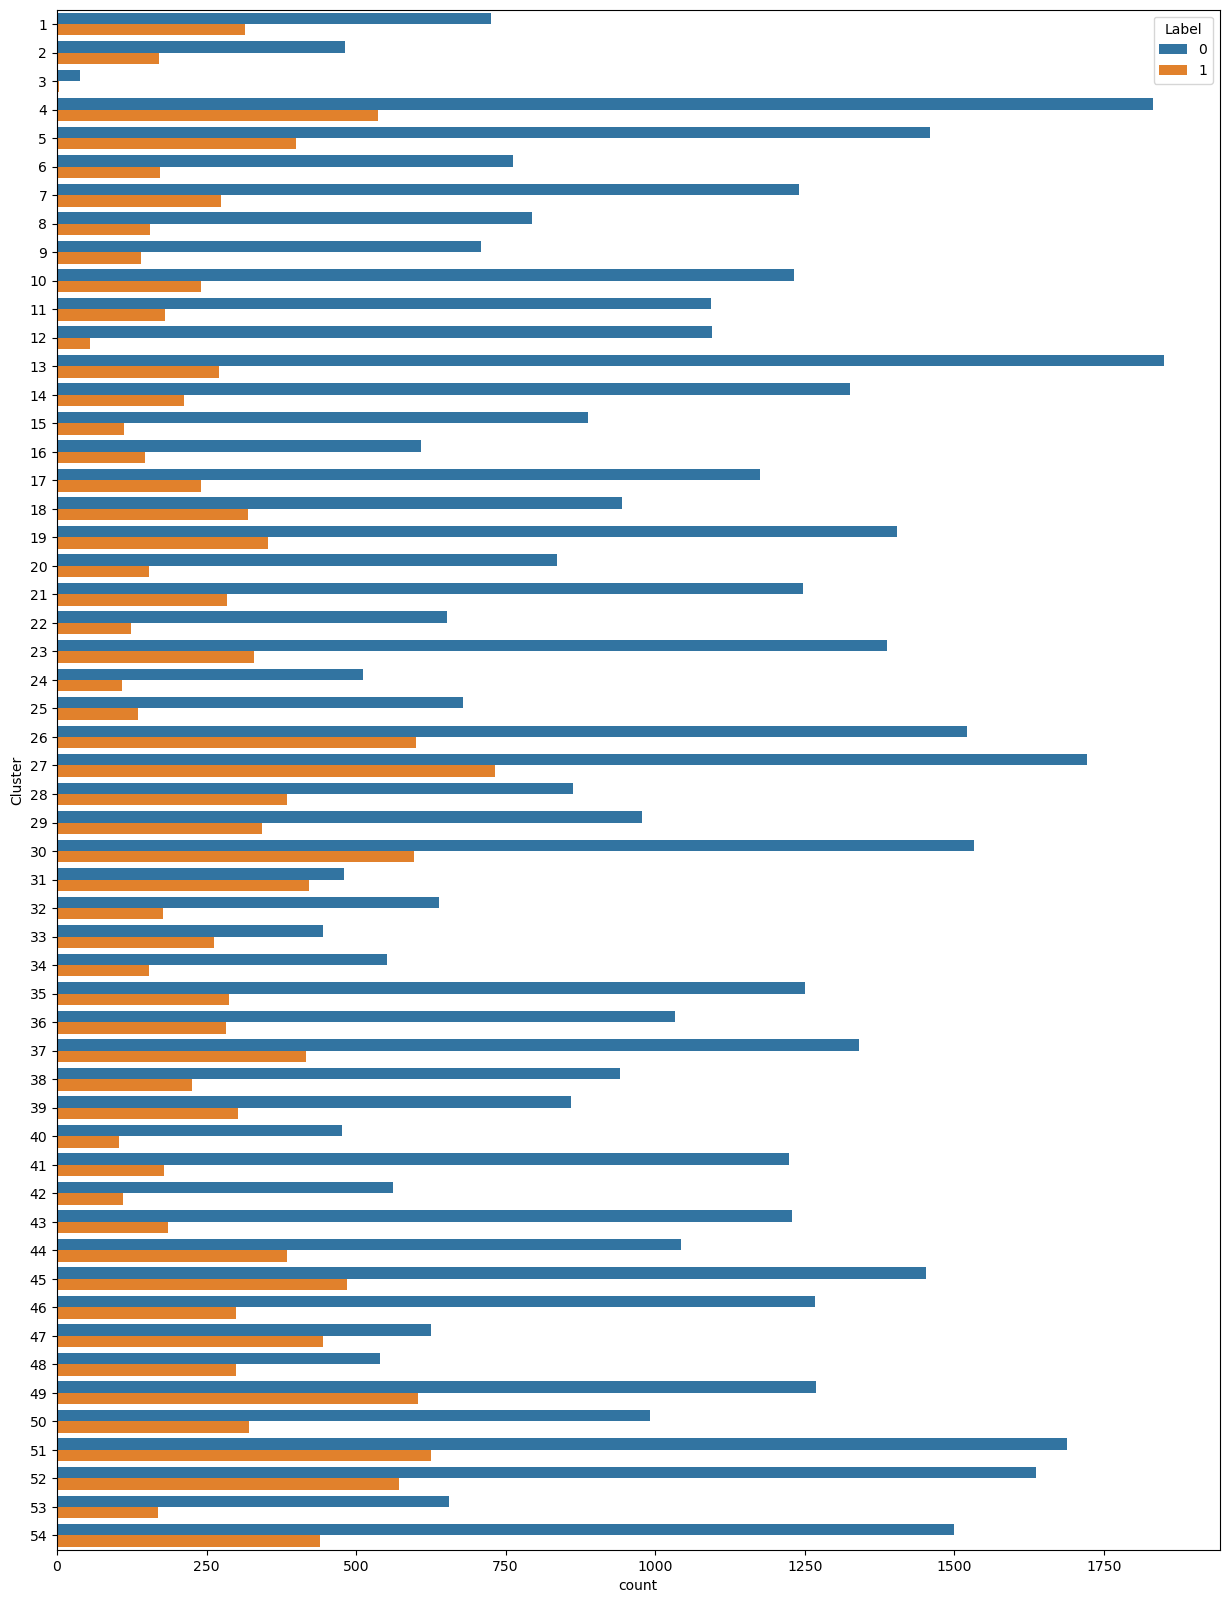

In [63]:
df_shap_2020['Code'] = lst_2020_cd
df_shap_2020['Date'] = lst_2020_dt
df_shap_2020['Label'] = df_data2020_Y[0]
df_shap_2020['Cluster'] = cut_tree_avg_shap_2020
df_shap_2020 = df_shap_2020[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]

# tsne feature 추가 
df_shap_2020['component1'] = np_tsne_shap_2020[:, 0]
df_shap_2020['component2'] = np_tsne_shap_2020[:, 1]

df_shap_2020.head()
plt.figure(figsize=(15, 20))
sns.countplot(data=df_shap_2020, y='Cluster', hue='Label')

<AxesSubplot:xlabel='Cluster'>

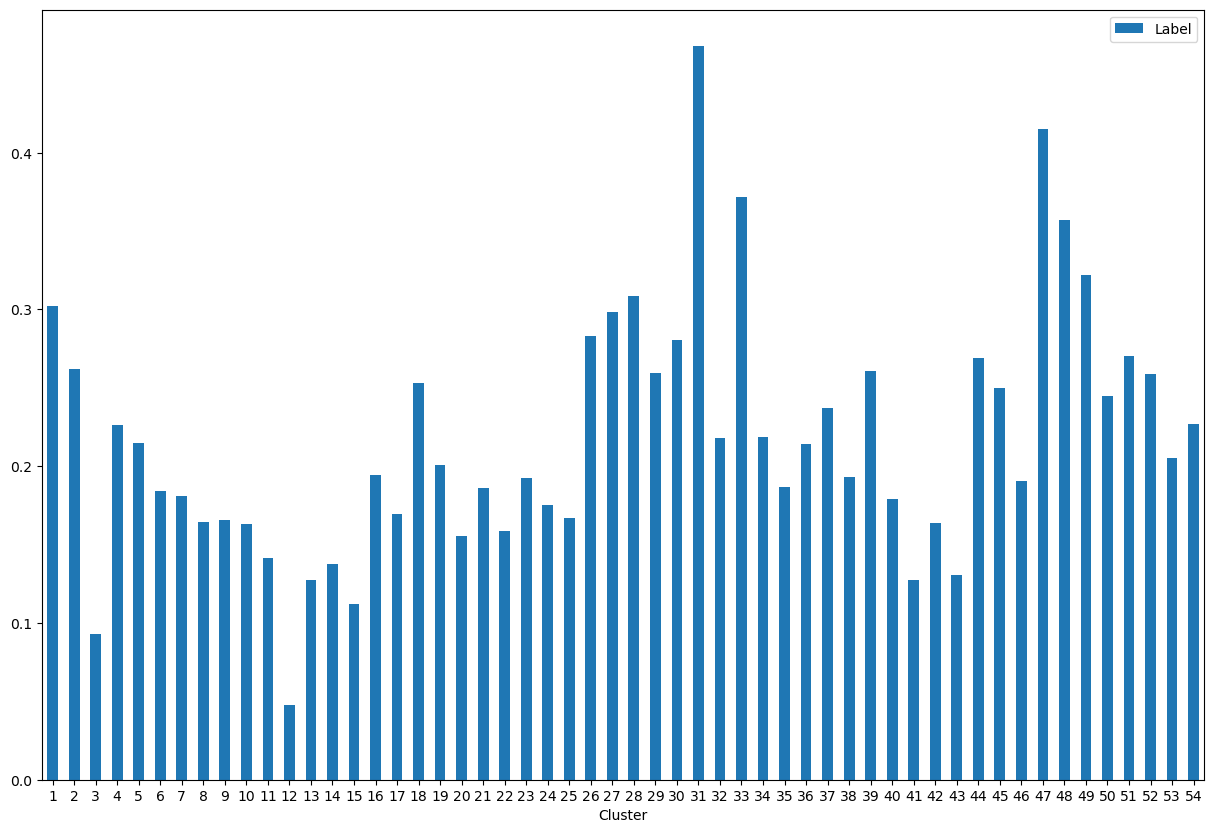

In [64]:
a = pd.DataFrame(df_shap_2020.groupby('Cluster')['Label'].sum()/df_shap_2020.groupby('Cluster')['Label'].count())
a.plot.bar(figsize=(15,10),rot=0)

--------------

#### 라벨 1의 비율이 ratio 이상인 군집만 시각화 하고, tsne plot과 비교해 보기 

label 1 > 0.35 군집 번호:  Int64Index([31, 33, 47, 48], dtype='int64', name='Cluster')


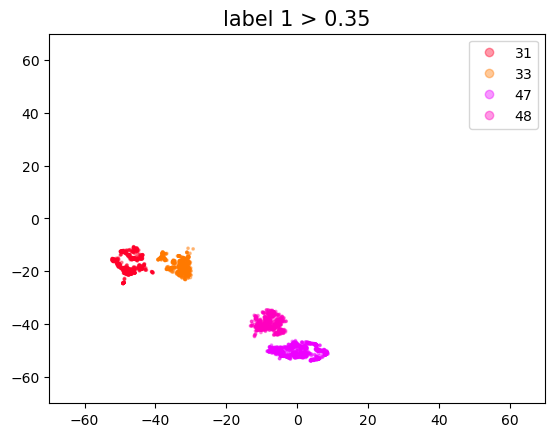

In [65]:
df_shap_2020_1 = label_1_clustering_plot(df_shap_2020, xlim=70,ylim=70, ratio=0.35)

In [66]:
print(df_shap_2020_1.shape) # 데이터, 차트 확인 
print(df_shap_2020_1['Date'].value_counts().head())
df_shap_2020_1.head()

(3519, 566)
20200413    308
20200417    261
20200416    257
20200414    187
20200908     34
Name: Date, dtype: int64


Code      Date  Cluster  D-9_Open  D-9_High   D-9_Low  D-9_Close  \
110  067290  20200413       47  0.002371  0.001835 -0.004308   0.000349   
111  067290  20200414       47  0.001258  0.001096  0.018206   0.000844   
136  067290  20200805       33  0.000234  0.000786 -0.007234  -0.000089   
146  067290  20200908       33 -0.000619  0.002983 -0.007032   0.002650   
183  024120  20201223       31  0.000837 -0.000677 -0.005181   0.000016   

     D-9_Trading   D-9_MA5  D-9_MA20  D-9_MA60  D-9_MA120  D-9_VMAP   D-9_BHB  \
110    -0.000415  0.000589 -0.000093 -0.000645  -0.000499  0.000935  0.001718   
111    -0.000265  0.000661 -0.000105 -0.000595  -0.000727  0.000717  0.002163   
136    -0.000047  0.002289 -0.000117  0.000101  -0.000754 -0.000188  0.000024   
146    -0.000374 -0.000065 -0.000022  0.000010   0.003085 -0.000445  0.001205   
183    -0.000409 -0.000328 -0.000038  0.000033  -0.002549  0.000893  0.001593   

      D-9_BLB   D-9_KCH   D-9_KCL   D-9_KCM   D-9_DCH   D-9_DCL   D-9_DCM  \
110  0.003615  0.003258  0.000375 -0.000076 -0.000589  0.001528  0.000226   
111  0.009559  0.001663 -0.000350 -0.000076  0.000343  0.001508  0.000089   
136 -0.001012 -0.002361  0.000010 -0.000027  0.000846  0.000206  0.000110   
146 -0.003505  0.003231 -0.000032 -0.000028  0.000225  0.000085  0.000200   
183 -0.000211  0.001186 -0.000402 -0.000035  0.000352 -0.001222 -0.000029   

      D-9_SMA   D-9_EMA   D-9_WMA  D-9_Ichimoku  D-9_Parabolic SAR  D-9_KAMA  \
110 -0.000812 -0.006954  0.001033      0.004735           0.000012 -0.002288   
111 -0.000821 -0.006961  0.001397      0.004265          -0.000137 -0.002213   
136 -0.000678  0.000437 -0.000943     -0.000794          -0.000080 -0.000101   
146 -0.001135  0.000128 -0.001021     -0.001042           0.000028  0.000082   
183  0.000844  0.000008  0.000946      0.000160           0.000036  0.000458   

     D-9_MACD  D-9_Change  D-9_Volume   D-9_MFI   D-9_ADI   D-9_OBV   D-9_CMF  \
110 -0.000047         0.0    0.000255 -0.000049 -0.000161 -0.001732  0.004932   
111 -0.000115         0.0    0.000107 -0.000010 -0.000301 -0.002104  0.007770   
136 -0.000027         0.0    0.000489  0.000102 -0.000333 -0.000625  0.007186   
146  0.000047         0.0    0.000443  0.000435 -0.000203 -0.001435  0.005272   
183 -0.000102         0.0   -0.000172  0.000349  0.000203 -0.002431  0.006663   

       D-9_FI  D-9_EOM_EMV   D-9_VPT   D-9_NVI   D-9_ATR    D-9_UI   D-9_ADX  \
110 -0.003212     0.004432  0.000258  0.004006 -0.000629  0.003441  0.000073   
111 -0.002257     0.004526  0.000464  0.002303 -0.000613 -0.000463 -0.000048   
136 -0.001985    -0.000932  0.000309  0.002672  0.000010  0.003661 -0.000052   
146 -0.002242    -0.002593  0.000163  0.003698  0.000010  0.002708 -0.000162   
183  0.001420     0.002009  0.001555 -0.002922  0.000018  0.002408  0.000068   

      D-9_-VI   D-9_+VI  D-9_TRIX    D-9_MI   D-9_CCI   D-9_DPO   D-9_KST  \
110  0.000723  0.002536 -0.000494 -0.000036  0.000094  0.000126 -0.002578   
111  0.000960  0.004501 -0.000389 -0.000242 -0.000005  0.000206 -0.007546   
136 -0.000206  0.002010 -0.000494 -0.000486 -0.000227  0.000775 -0.002411   
146  0.001033  0.001964  0.000327 -0.001478 -0.000022 -0.000863  0.002620   
183 -0.000086 -0.011861 -0.000096  0.001151  0.000392  0.000132 -0.001066   

      D-9_STC   D-9_RSI  ...  D-0_VMAP   D-0_BHB   D-0_BLB   D-0_KCH  \
110 -0.000449  0.000067  ...  0.046830 -0.000598  0.000120 -0.004727   
111 -0.000493 -0.000136  ...  0.021055  0.026144  0.000612 -0.004006   
136 -0.000525  0.000219  ... -0.010207 -0.001140 -0.000509 -0.003783   
146  0.000234 -0.000019  ... -0.011619 -0.000613 -0.000560 -0.003255   
183  0.001196  0.000065  ... -0.005282  0.019239  0.001488  0.013971   

      D-0_KCL   D-0_KCM   D-0_DCH   D-0_DCL   D-0_DCM   D-0_SMA   D-0_EMA  \
110  0.160406 -0.000028  0.067158  0.005094 -0.000152 -0.000029  0.001463   
111  0.123983 -0.000028  0.099098  0.002783 -0.000109  0.000012 -0.000999   
136  0.101183 -0.000026  0.112

In [86]:
# 클러스터 25 데이터만 따로 보기 
#print(df_shap_2020_1[df_shap_2020_1['Cluster']==47]['Code','Date'].value_counts())
#df_shap_2020_1.head()
print(df_shap_2020_1[df_shap_2020_1['Date']=='20200908'][['Code','Cluster']])
#print(df_shap_2020_1[df_shap_2020_1['Cluster'] == 47])
#print(df_shap_2020_1['Date'].value_counts().head())
#print(df_shap_2020_1[['Date','Cluster']].value_counts().head())
#print(df_shap_2019_1[df_shap_2019_1['Date'] == '20190122'])

         Code  Cluster
146    067290       33
905    023910       33
1114   066900       48
1744   013810       33
1779   139050       48
1860   208640       31
4003   036930       48
4054   119850       48
5331   065770       33
5749   039860       48
6296   100130       48
8231   073540       33
8530   101170       48
9886   150900       33
11073  052220       33
13199  038110       33
14589  047820       31
14828  121850       33
18312  088800       48
18541  053280       48
20073  022100       31
22346  033200       48
31251  049080       48
31400  142280       33
32021  080420       31
32211  100090       48
33502  032820       48
41856  155660       48
42472  010060       48
50120  009680       48
50718  011930       48
54939  075580       31
57989  012510       48
59478  103590       48


#### 라벨 1이 더 많은 군집 (ratio=0.5)을 라벨 1 로 하여 학습한 후, summary plot 시각화 

===start xgb===
[23:14:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
===complete xgb===
===start shap value===


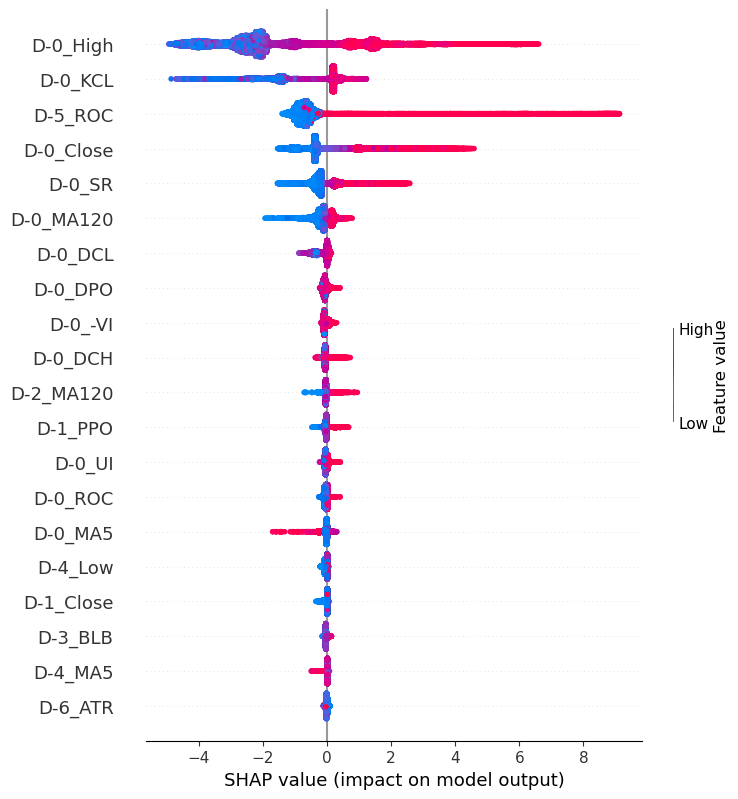

===start shap value===


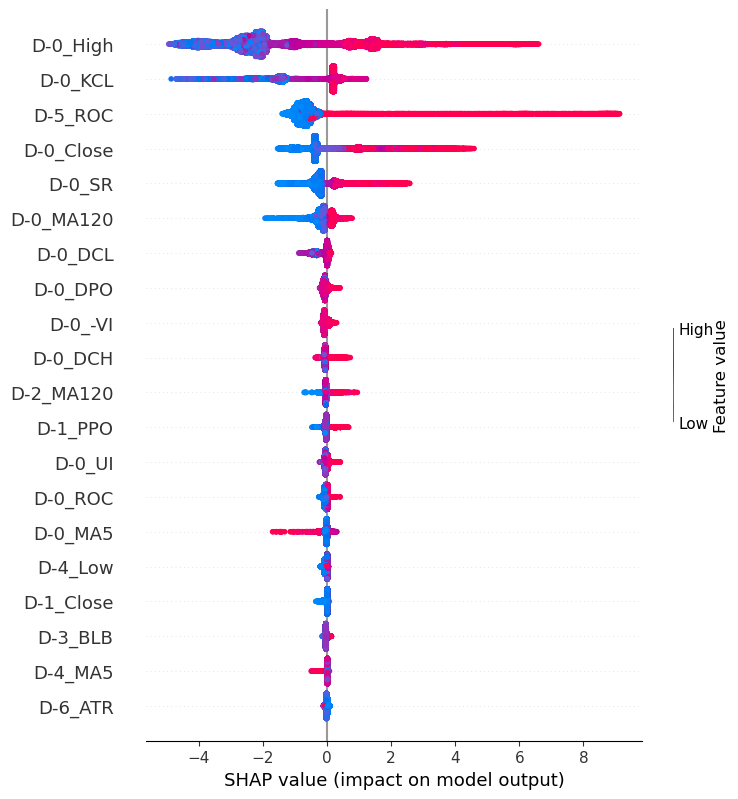

In [68]:
xgb_summary_plot(df_shap_2020, df_shap_2020_1, year=2020, mode='save') 
xgb_summary_plot(df_shap_2020, df_shap_2020_1, year=2020, mode='load') # 학습 후 load로

# feature importance

===start shap value===


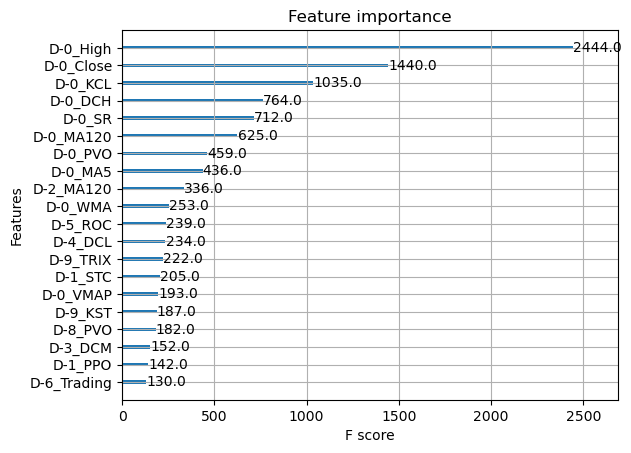

In [69]:
xgb_importance(df_shap_2019, df_shap_2019_1, year=2019, mode='load') 

===start shap value===


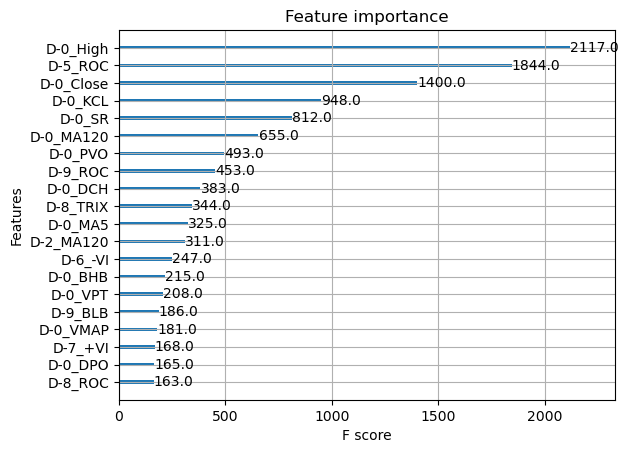

In [70]:
#xgb_importance(df_shap_2020, df_shap_2020_1, year=2020, mode='save')
xgb_importance(df_shap_2020, df_shap_2020_1, year=2020, mode='load') 

In [71]:
#xgb_importance(df_shap_2021, df_shap_2021_1, year=2020, mode='save')
xgb_importance(df_shap_2021, df_shap_2021_1, year=2021, mode='load') 

NameError: name 'df_shap_2021_1' is not defined

### 해석 
- 라벨 1이 라벨 0보다 많은 군집(label 1 ratio > 0.5)은 1, 25, 31, 33 번 이다.
- 위 군집을 라벨 1로 하여 학습 한 후, summary plot을 시각화 하였다. 
- summary plot에 따라 D-0_DCL, D-1_Open의 값이 높을 수록, D-6_KCL,... 의 값이 낮을 수록 라벨 1이 많은 군집 (2% 상승한 데이터가 많은 군집)일 확률이 높을 것이라고 유추할 수 있다. 

## [shap] 2021

### tsne

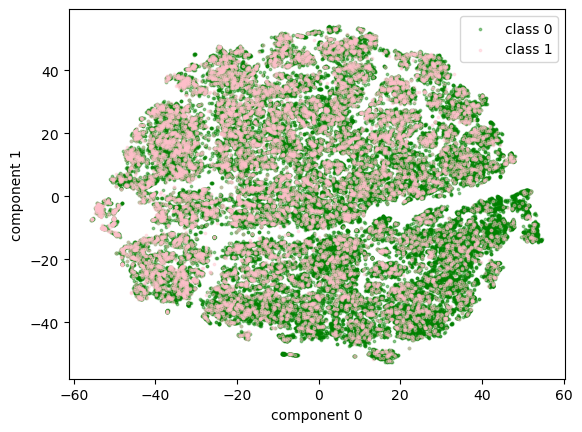

In [87]:
import pickle
with open('./year_data/np_tsne_shap_2021.pickle', 'rb') as f:
    np_tsne_shap_2021 = pickle.load(f)
    
tsne_plot(np_tsne=np_tsne_shap_2021, df_data_Y=df_data2021_Y)

### average

군집의 개수: 56


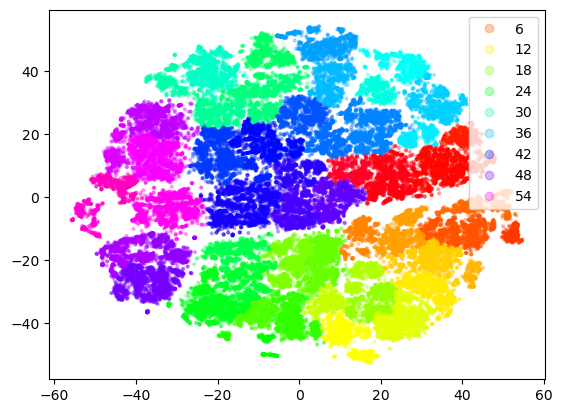

In [88]:
import pickle
with open('./year_data/clusters_avg_shap_2021.pickle', 'rb') as f:
    clusters_avg_shap_2021 = pickle.load(f)
    
cut_tree_avg_shap_2021=fcluster_plot(np_clusters=clusters_avg_shap_2021, np_tsne=np_tsne_shap_2021, t=10) # t가 작을수록 군집 개수 증가

##### 군집 별 데이터(label) 확인

<AxesSubplot:xlabel='count', ylabel='Cluster'>

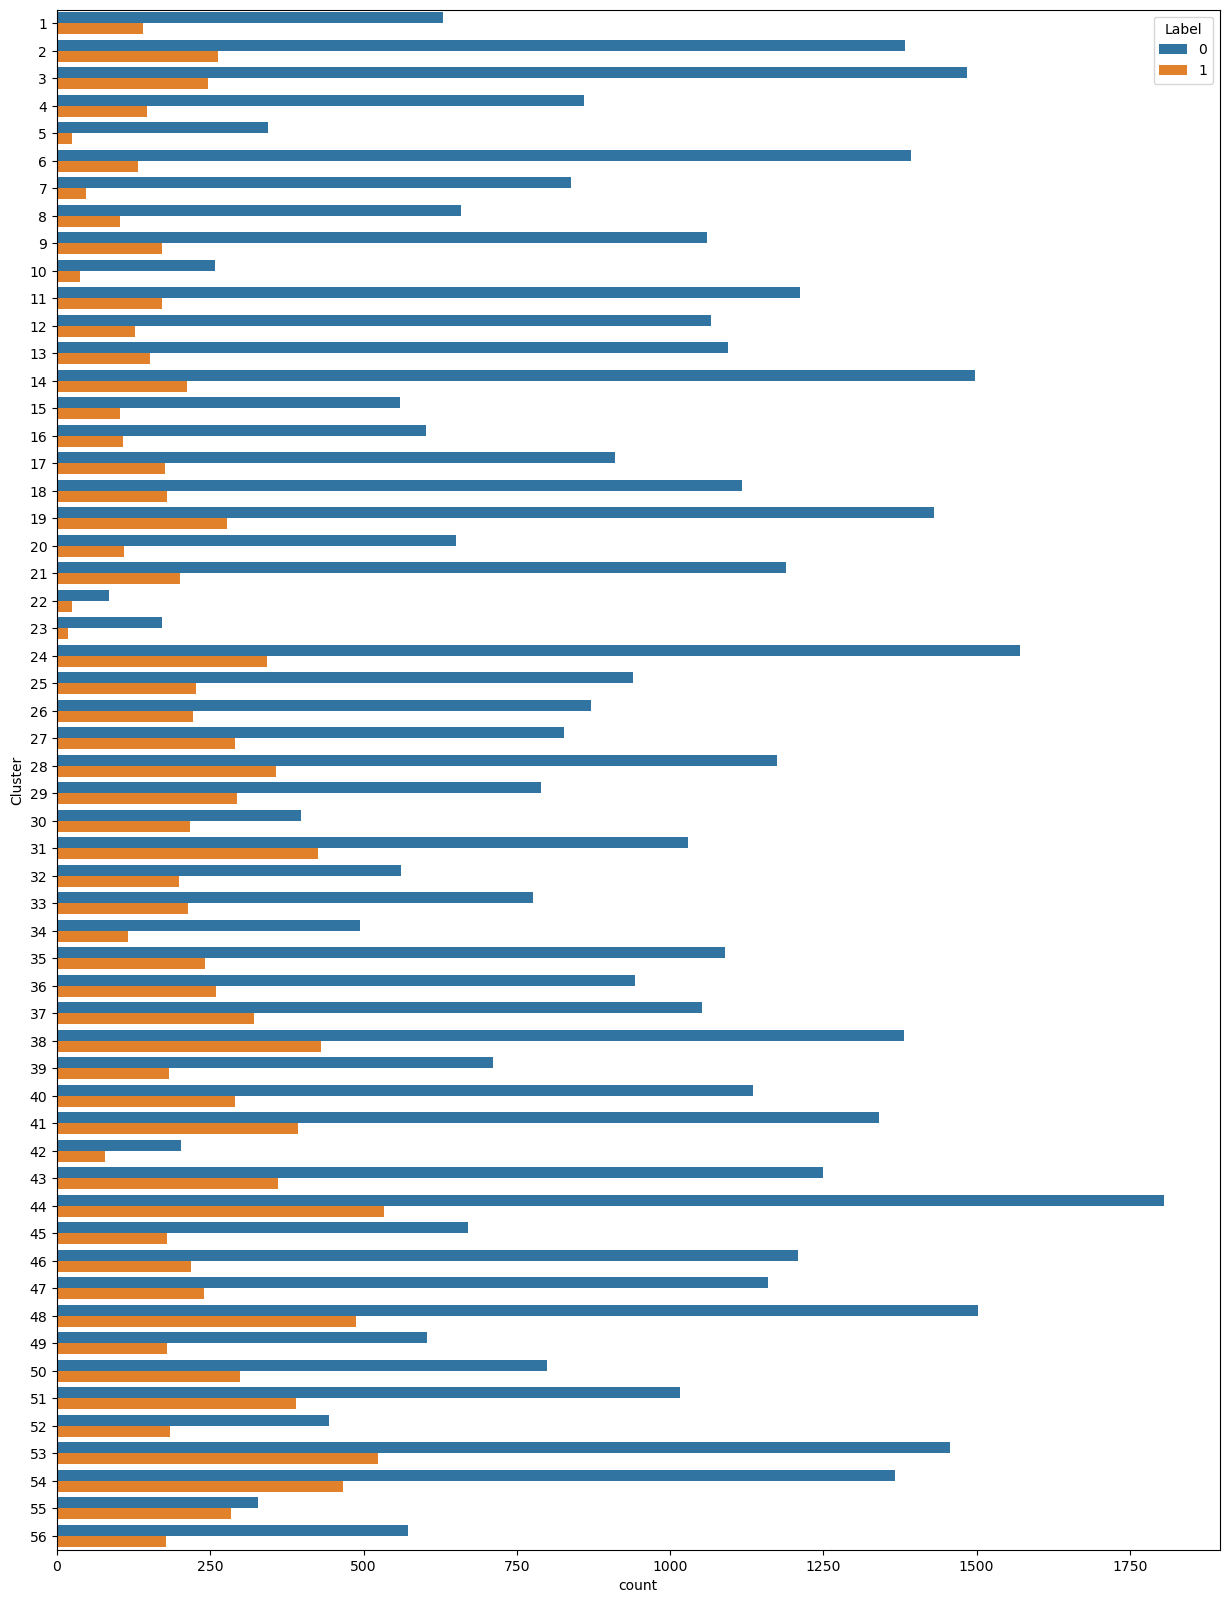

In [89]:
df_shap_2021['Code'] = lst_2021_cd
df_shap_2021['Date'] = lst_2021_dt
df_shap_2021['Label'] = df_data2021_Y[0]
df_shap_2021['Cluster'] = cut_tree_avg_shap_2021
df_shap_2021 = df_shap_2021[['Code', 'Date', 'Cluster']+lst_col_info+['Label']]

# tsne feature 추가 
df_shap_2021['component1'] = np_tsne_shap_2021[:, 0]
df_shap_2021['component2'] = np_tsne_shap_2021[:, 1]

df_shap_2021.head()
plt.figure(figsize=(15, 20))
sns.countplot(data=df_shap_2021, y='Cluster', hue='Label')

<AxesSubplot:xlabel='Cluster'>

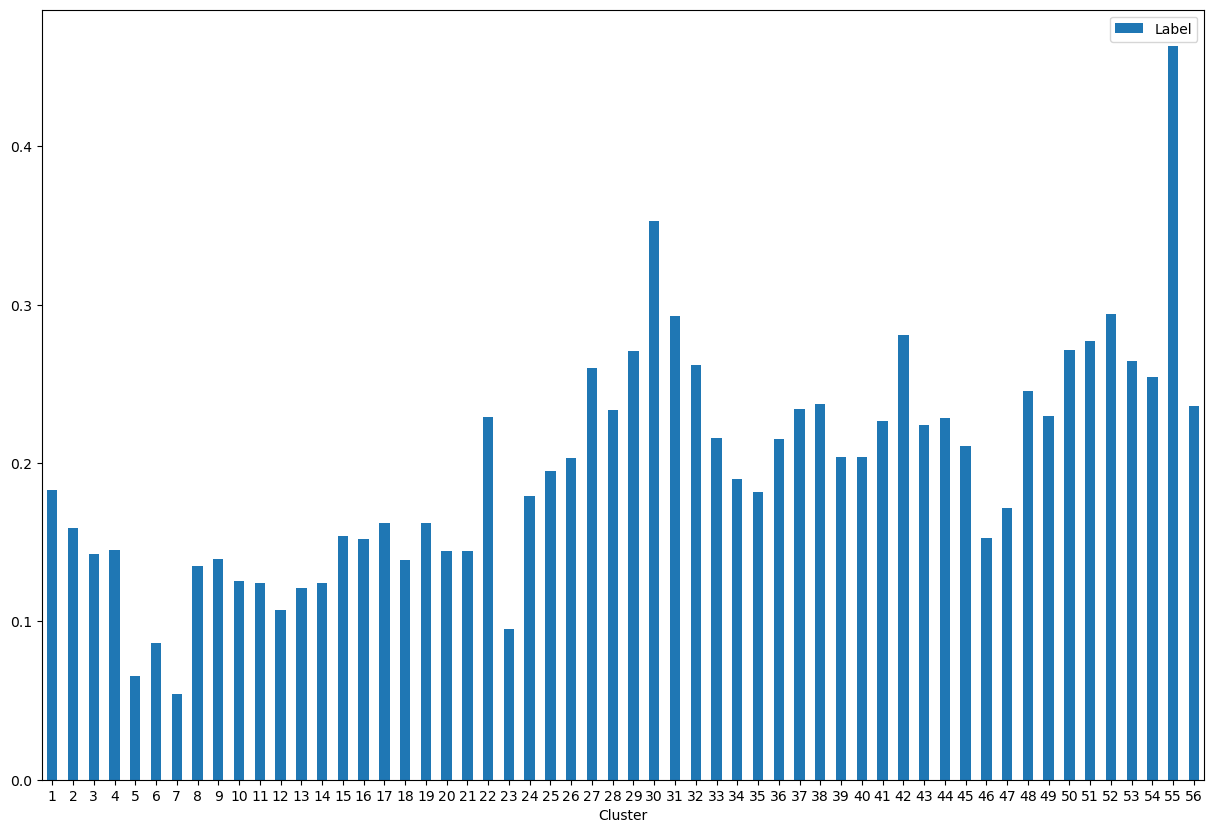

In [90]:
a = pd.DataFrame(df_shap_2021.groupby('Cluster')['Label'].sum()/df_shap_2021.groupby('Cluster')['Label'].count())
a.plot.bar(figsize=(15,10),rot=0)

#### 라벨 1의 비율 ratio 이상인 군집만 시각화 하고, tsne plot과 비교해 보기 

label 1 > 0.28 군집 번호:  Int64Index([30, 31, 42, 52, 55], dtype='int64', name='Cluster')


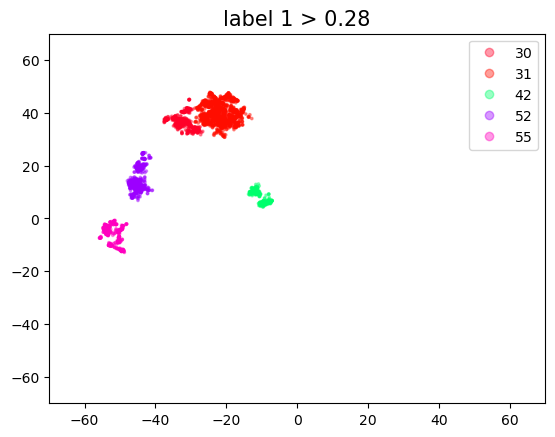

In [91]:
df_shap_2021_1 = label_1_clustering_plot(df_shap_2021, xlim=70, ylim=70, ratio=0.28) # ratio 조정 (1의 비율)

In [92]:
print(df_shap_2021_1.shape) # 데이터, 차트 확인 
print(df_shap_2021_1['Date'].value_counts().head())
df_shap_2021_1.head()

(3591, 566)
20210120    38
20210217    37
20210222    37
20210118    36
20210913    36
Name: Date, dtype: int64


Code      Date  Cluster  D-9_Open  D-9_High   D-9_Low  D-9_Close  \
41   050120  20211102       42  0.000148 -0.001766  0.000616  -0.000045   
106  095340  20211208       31  0.000122  0.000152 -0.001104  -0.000198   
133  024120  20210126       31 -0.000943  0.000749 -0.005013  -0.000092   
136  024120  20210202       52  0.000637  0.001166 -0.004260  -0.000109   
138  024120  20210204       55 -0.000769 -0.000227 -0.002917  -0.000083   

     D-9_Trading   D-9_MA5  D-9_MA20  D-9_MA60  D-9_MA120  D-9_VMAP   D-9_BHB  \
41      0.000241  0.000175 -0.000124 -0.000375   0.002755 -0.000062  0.001471   
106     0.000122 -0.000473 -0.000137 -0.000152   0.002505 -0.000243  0.001084   
133    -0.001040  0.000099 -0.000026 -0.000125   0.003255 -0.000090  0.001307   
136     0.000318 -0.000177 -0.000004  0.000074   0.003817 -0.000094  0.002245   
138     0.000016  0.000223 -0.000125  0.000480   0.002683 -0.000370  0.000297   

      D-9_BLB   D-9_KCH   D-9_KCL   D-9_KCM   D-9_DCH   D-9_DCL   D-9_DCM  \
41  -0.004348 -0.002157 -0.000063 -0.000026  0.000271  0.000141  0.000269   
106 -0.001899 -0.002369 -0.000038 -0.000021  0.000981  0.000156 -0.000191   
133  0.002909 -0.000362  0.000316 -0.000014  0.000015  0.000861 -0.000130   
136 -0.003769  0.001619 -0.000135 -0.000055  0.000183  0.001587 -0.000101   
138 -0.001418 -0.001357  0.000205 -0.000015  0.000385  0.000715  0.000789   

      D-9_SMA       D-9_EMA   D-9_WMA  D-9_Ichimoku  D-9_Parabolic SAR  \
41  -0.000641  4.626068e-04 -0.000278      0.004597          -0.000387   
106 -0.000904  3.050325e-06 -0.000586     -0.000513          -0.000086   
133  0.000201 -1.681715e-05  0.002777     -0.000747          -0.000016   
136  0.000709  4.294866e-07 -0.000440     -0.000937          -0.000042   
138 -0.001018  1.414875e-04 -0.002164      0.011423          -0.000046   

     D-9_KAMA  D-9_MACD  D-9_Change  D-9_Volume   D-9_MFI   D-9_ADI   D-9_OBV  \
41  -0.000019 -0.000049         0.0   -0.000815  0.000017 -0.000582 -0.002790   
106  0.000013  0.000067         0.0    0.000115  0.000369  0.000040 -0.001116   
133  0.000085  0.000128         0.0   -0.001475  0.000135 -0.000116 -0.002017   
136  0.000017  0.000130         0.0   -0.000387  0.000084 -0.000027 -0.000824   
138  0.000088  0.000020         0.0   -0.000313  0.000220 -0.000009 -0.001695   

      D-9_CMF    D-9_FI  D-9_EOM_EMV   D-9_VPT   D-9_NVI   D-9_ATR    D-9_UI  \
41   0.005004  0.000883     0.001981 -0.000075  0.001960  0.000003  0.003262   
106  0.007091 -0.001292     0.002000 -0.000067  0.002769 -0.000010  0.002809   
133 -0.005874 -0.002153    -0.001223  0.000208 -0.001987 -0.000002  0.003035   
136 -0.002905 -0.001357    -0.003768  0.000050 -0.001737 -0.000159  0.002525   
138 -0.007677 -0.000288    -0.003195  0.001198 -0.000462  0.000013  0.002379   

      D-9_ADX   D-9_-VI   D-9_+VI  D-9_TRIX    D-9_MI   D-9_CCI   D-9_DPO  \
41  -0.000150  0.000517  0.003165 -0.000229 -0.001491 -0.000012  0.000085   
106 -0.000234 -0.000075  0.001993  0.000203 -0.000956  0.000062 -0.000138   
133 -0.000762  0.000278 -0.003409  0.000238 -0.011316 -0.000061 -0.000132   
136 -0.000334 -0.000165  0.003408  0.000400 -0.000331  0.000282  0.000148   
138 -0.000579  0.000415  0.001418  0.000335 -0.000116 -0.000198 -0.002615   

      D-9_KST   D-9_STC   D-9_RSI  ...  D-0_VMAP   D-0_BHB   D-0_BLB  \
41  -0.001086 -0.000437  0.000144  ... -0.012614 -0.001286 -0.000681   
106  0.002334 -0.000510 -0.000149  ... -0.011628 -0.000873 -0.000409   
133  0.002200 -0.000513  0.000038  ... -0.009229 -0.001070 -0.000679   
136  0.000637  0.000544  0.000087  ... -0.007967 -0.000494 -0.000586   
138  0.001248  0.000549  0.000093  ... -0.007327  0.010016 -0.000633   

      D-0_KCH   D-0_KCL   D-0_KCM   D-0_DCH   D-0_DCL   D-0_DCM   D-0_SMA  \
41  -0.005288  0.105001 -0.000029  0.068244 -0.000087 -0.000529  0.000053   
106 -0.003660  0.123960 -0.000026  0.057160  0.001107 -0.000005 -0.000021   
133 -0.003365  0.121197 -0.000124  0.076053  0.000912 -0.000420 -0

#### 라벨 0의 비율 ratio 이상인 군집만 시각화 하고, tsne plot과 비교해 보기 <br>
: 핑크색은 고르게 분포되어 있고 초록색이 뚜렷하게 진할 경우에 진행 

In [ ]:
df_shap_2021_0 = label_0_clustering_plot(df_shap_2021, xlim=70,ylim=70, ratio=0.9) # ratio 조정 (1의 비율)

In [ ]:
print(df_shap_2021_0.shape) # 데이터, 차트 확인 
print(df_shap_2021_0['Date'].value_counts().head())
df_shap_2021_0.head()

In [94]:
# 클러스터 25 데이터만 따로 보기 
#print(df_shap_2021_1[df_shap_2021_1['Cluster']== 30]['Code','Date'].value_counts())
#df_shap_2021_1.head()
print(df_shap_2021_1[df_shap_2021_1['Date']=='20210913'][['Code','Cluster']])
#print(df_shap_2021_1[df_shap_2021_1['Cluster'] == 30])
#print(df_shap_2020_1['Cluster'].value_counts().head())
#print(df_shap_2021_1[['Date','Cluster']].value_counts().head())
#print(df_shap_2019_1[df_shap_2019_1['Date'] == '20190122'])

         Code  Cluster
2996   115310       52
3675   102940       31
7610   192390       30
8055   022220       42
9035   087600       42
11375  020710       30
12113  008370       30
12549  033230       31
15357  042600       55
15586  094840       31
18211  023460       30
18338  115450       55
19093  048910       31
19301  194480       55
19438  023790       52
20094  009620       31
20415  045300       31
21998  016920       30
22433  128660       52
23208  035460       31
24130  100660       31
25244  009780       30
25319  014940       31
28822  011370       31
31232  204840       31
31901  075130       31
33213  071280       31
37397  155660       30
41596  033920       31
48313  008110       31
52938  006660       31
56018  030720       31
59256  003610       31
60387  001620       31
61489  000680       31
61676  214330       31


#### 라벨 1의 비율이 ratio 이상인 군집을 라벨 1 로 하여 학습한 후, summary plot 시각화 

In [ ]:
xgb_summary_plot(df_shap_2021, df_shap_2021_1, year=2021, mode='save') 
xgb_summary_plot(df_shap_2021, df_shap_2021, year=2021, mode='load') # 학습 후 load로 변경